In [1]:
import numpy as np 
import pandas as pd
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_curve, auc, silhouette_samples, silhouette_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.tree import export_graphviz, plot_tree, DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import stats
from scipy.stats import randint
from scipy.stats import randint as sp_randint
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import plotly.offline as pyoff
import plotly.graph_objs as go
from pandas.plotting import scatter_matrix
import feature_engine
from feature_engine.outliers import Winsorizer
from ydata_profiling import ProfileReport
import pickle
import joblib
from IPython.display import Image
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("dim_customer.csv")
profile = ProfileReport(df, title="dim_customer")
profile.to_file("dim_customer.html")

df = pd.read_csv("dim_payments.csv")
profile = ProfileReport(df, title="dim_payments")
profile.to_file("dim_payments.html")

df = pd.read_csv("dim_product.csv")
profile = ProfileReport(df, title="dim_product")
profile.to_file("dim_product.html")

df = pd.read_csv("fact_orders.csv")
profile = ProfileReport(df, title="fact_orders")
profile.to_file("fact_orders.html")

df = pd.read_csv("fact_order_item.csv")
profile = ProfileReport(df, title="dim_customer")
profile.to_file("dim_customer.html")

In [ ]:
df = pd.read_csv("data-1681241863358.csv")
profile = ProfileReport(df, title="data-1681241863358")
profile.to_file("features_2.0.html")

In [ ]:
rm(list = ls())
graphics.off()

url_path <- paste0("data-1681241863358.csv")
features <- read.csv(url_path, sep = ",")
rm(url_path)
future<-features


# convert the date column to a Date object
features$bought_at <- as.Date(features$bought_at)

# set the cutoff date
cutoff_date <- as.Date("2017-12-31")

# use subset to select all data before the cutoff date
features <- subset(features, bought_at < cutoff_date)
future <- subset(future, bought_at > cutoff_date)
write.csv(future, "future.csv", row.names=FALSE)

summary(features)

#total_price
#quantile(features$total_price)

#quartiles <- quantile(features$total_price, probs=c(.25, .75), na.rm = FALSE)
#IQR <- IQR(features$total_price)
#IQR
#Lower <- quartiles[1] - 3*IQR
#Upper <- quartiles[2] + 3*IQR

#features<- subset(features, features$total_price > Lower & features$total_price < Upper)
#length(features)
#summary(features)

# total_freight_value

#quantile(features$total_freight_value)

#quartiles <- quantile(features$total_freight_value, probs=c(.25, .75), na.rm = FALSE)
#IQR <- IQR(features$total_freight_value)
#IQR
#Lower <- quartiles[1] - 3*IQR
#Upper <- quartiles[2] + 3*IQR

#features<- subset(features, features$total_freight_value > Lower & features$total_freight_value < Upper)
#length(features)
#summary(features)

# nr_payment_installments

#existem valores com 0 isto possivelmente terá sido um erro, uma vez que existe a necessidade
# de ter o pagamento com pelo menos uma parcela

sum(features$nr_payment_installments == 0)
#subsituir esse valor por 1 parcela de pagamento
features$nr_payment_installments[features$nr_payment_installments == 0] <- 1
#summary(features)

#quantile(features$nr_payment_installments)

#quartiles <- quantile(features$nr_payment_installments, probs=c(.25, .75), na.rm = FALSE)
#IQR <- IQR(features$nr_payment_installments)
#IQR
#Lower <- quartiles[1] - 3*IQR
#Upper <- quartiles[2] + 3*IQR

#features<- subset(features, features$nr_payment_installments > Lower & features$nr_payment_installments < Upper)
#length(features)
#summary(features)

# nr_payment_sequential

#Lower <- mean(features$nr_payment_sequential) - 3* sd(features$nr_payment_sequential)
#Upper <- mean(features$nr_payment_sequential) + 3* sd(features$nr_payment_sequential)

#features<- subset(features, features$nr_payment_sequential > Lower & features$nr_payment_sequential < Upper)
#length(features)
#summary(features)

# quantity

#Lower <- mean(features$quantity) - 3* sd(features$quantity)
#Upper <- mean(features$quantity) + 3* sd(features$quantity)

#features<- subset(features, features$quantity > Lower & features$quantity < Upper)
#length(features)
#summary(features)

# distinct_products_quantity

#Lower <- mean(features$distinct_products_quantity) - 3* sd(features$distinct_products_quantity)
#Upper <- mean(features$distinct_products_quantity) + 3* sd(features$distinct_products_quantity)

#features<- subset(features, features$distinct_products_quantity > Lower & features$distinct_products_quantity < Upper)
#length(features)
#summary(features)

# days_to_deliver

#quantile(features$days_to_deliver)

#quartiles <- quantile(features$days_to_deliver, probs=c(.25, .75), na.rm = FALSE)
#IQR <- IQR(features$days_to_deliver)
#IQR
#Lower <- quartiles[1] - 3*IQR
#Upper <- quartiles[2] + 3*IQR

#features<- subset(features, features$days_to_deliver > Lower & features$days_to_deliver < Upper)
#length(features)
#summary(features)

# days_delay

#quantile(features$days_delay)

#quartiles <- quantile(features$days_delay, probs=c(.25, .75), na.rm = FALSE)
#IQR <- IQR(features$days_delay)
#IQR
#Lower <- quartiles[1] - 3*IQR
#Upper <- quartiles[2] + 3*IQR

#features<- subset(features, features$days_delay > Lower & features$days_delay < Upper)
#length(features)
#summary(features)


write.csv(features, "data_no_nulls_outliers.csv", row.names=FALSE)


   order_id         customer_unique_id    quantity     
 Length:43623       Length:43623       Min.   : 1.000  
 Class :character   Class :character   1st Qu.: 1.000  
 Mode  :character   Mode  :character   Median : 1.000  
                                       Mean   : 1.141  
                                       3rd Qu.: 1.000  
                                       Max.   :21.000  
 distinct_products_quantity  total_price       total_freight_value
 Min.   :1.00               Min.   :    2.29   Min.   :   0.00    
 1st Qu.:1.00               1st Qu.:   45.90   1st Qu.:  14.10    
 Median :1.00               Median :   84.99   Median :  16.60    
 Mean   :1.04               Mean   :  137.42   Mean   :  22.08    
 3rd Qu.:1.00               3rd Qu.:  149.90   3rd Qu.:  23.71    
 Max.   :7.00               Max.   :13440.00   Max.   :1002.29    
 delivered_at         bought_at          days_to_deliver    days_delay     
 Length:43623       Min.   :2016-10-03   Min.   :  0.00   Min. 

[1] 0

In [2]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}".format(column, skew))
    plt.show()
    return

def RScore (x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FMScore (x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def rfm_level(score):
    if  ((score < 4)):
        return 'Score 1-3'
    elif ((score >3) and (score < 7)):
        return 'Score 4-6'
    elif ((score > 6) and (score < 10)):
        return 'Score 7-9'
    else:
        return 'Score 10-12'

           quantity  distinct_products_quantity   total_price  \
count  43623.000000                43623.000000  43623.000000   
mean       1.141485                    1.039589    137.422349   
std        0.534594                    0.231838    216.864608   
min        1.000000                    1.000000      2.290000   
25%        1.000000                    1.000000     45.900000   
50%        1.000000                    1.000000     84.990000   
75%        1.000000                    1.000000    149.900000   
max       21.000000                    7.000000  13440.000000   

       total_freight_value  days_to_deliver    days_delay  \
count         43623.000000     43623.000000  43623.000000   
mean             22.083435        13.018522    -12.479082   
std              19.455164         9.666116     10.150988   
min               0.000000         0.000000   -140.000000   
25%              14.100000         7.000000    -17.000000   
50%              16.600000        11.000000    -

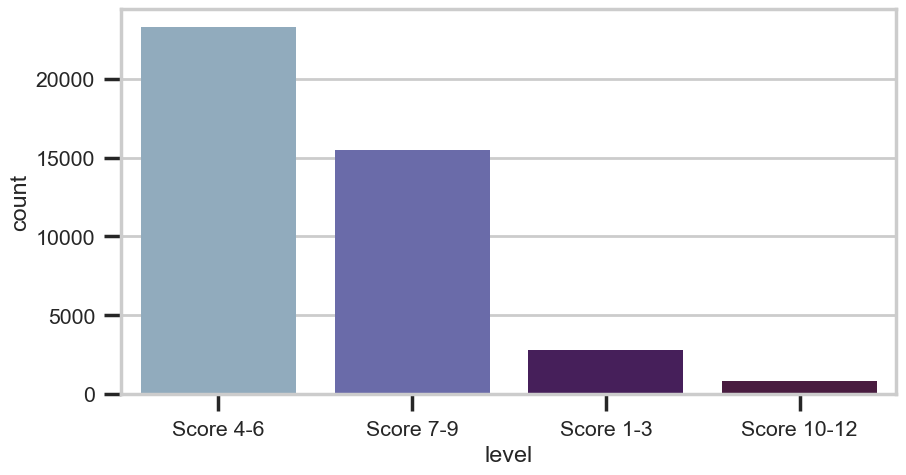

                recency           frequency            monetary         \
                   mean  min  max      mean min max        mean    min   
level                                                                    
Score 1-3    278.570658  216  455  1.000000   1   1   43.235671  12.28   
Score 10-12   81.621723    3  215  2.122347   2   8  338.095918  63.63   
Score 4-6    169.638603    2  455  1.000473   1   3  116.870967  10.07   
Score 7-9     72.635454    2  451  1.025121   1   6  248.563093  39.34   

                              
                  max  count  
level                         
Score 1-3       62.80   2781  
Score 10-12   3559.99    801  
Score 4-6     6929.31  23257  
Score 7-9    13664.08  15485  
            recency     frequency      monetary  avg_quantity  \
count  42324.000000  42324.000000  42324.000000  42324.000000   
mean     139.640133      1.030692    164.401305      1.141291   
std       98.025979      0.194138    232.797227      0.527779   
min 

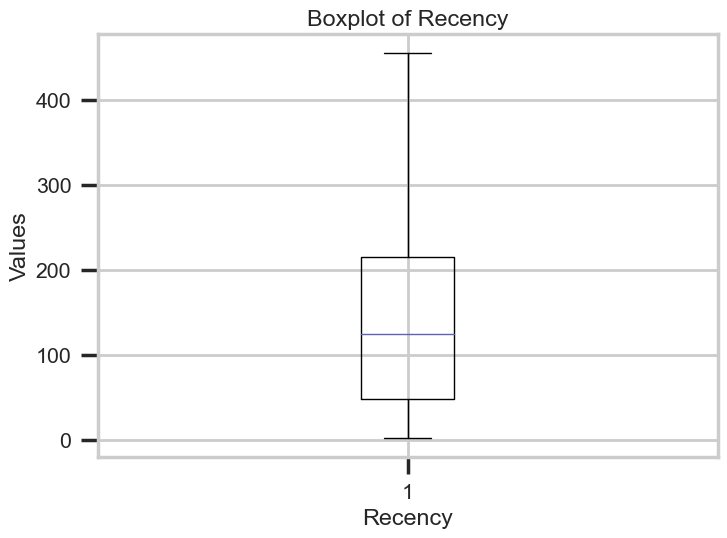

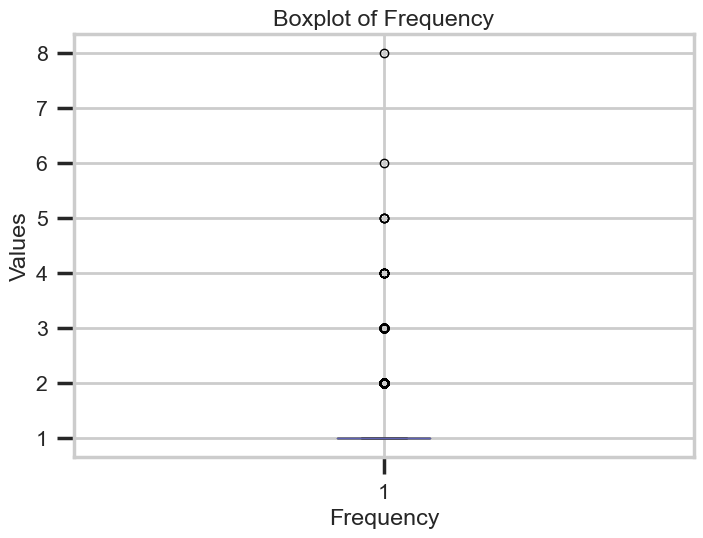

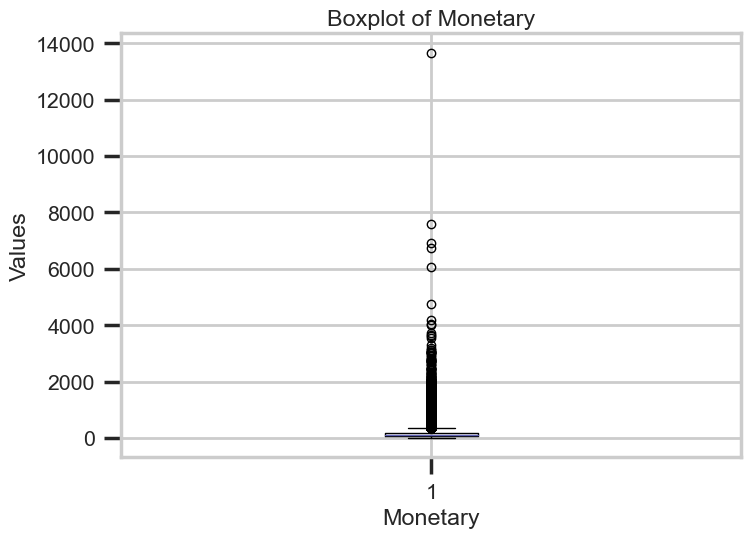

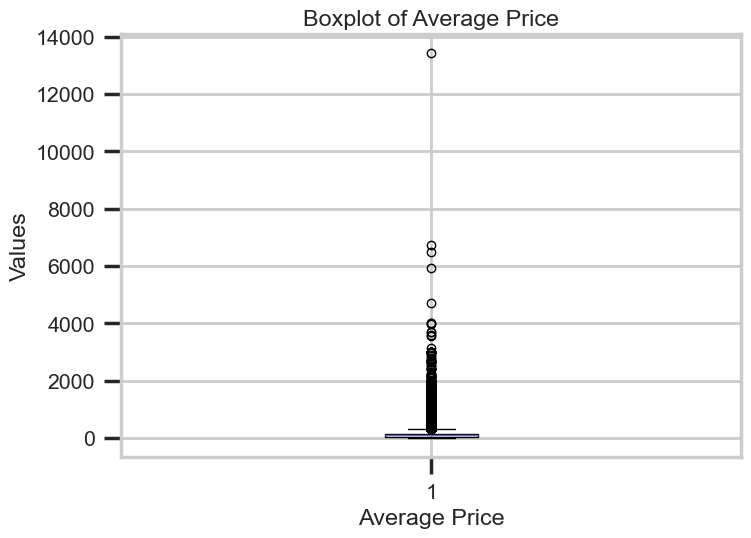

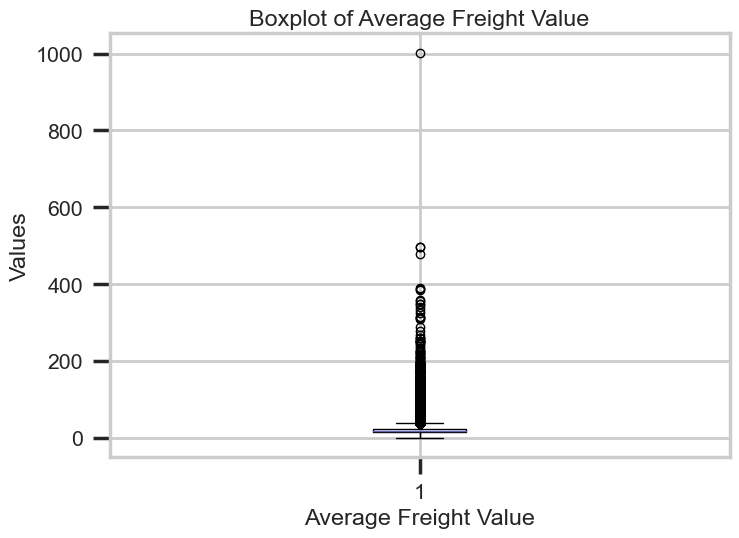

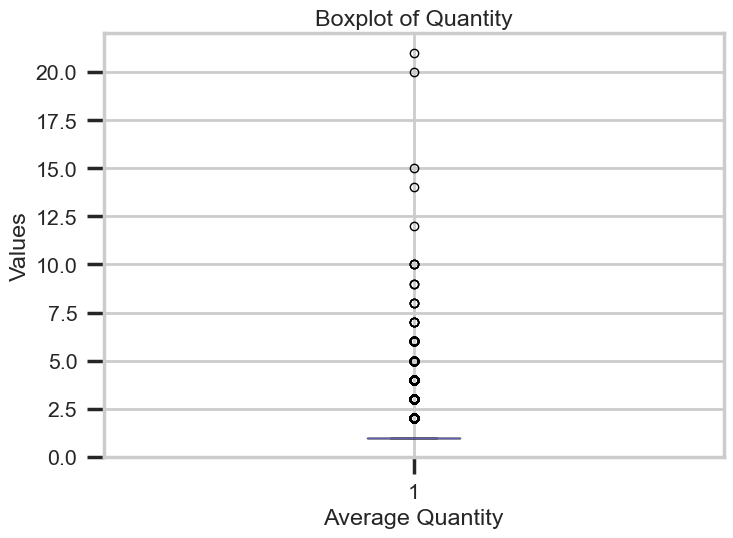

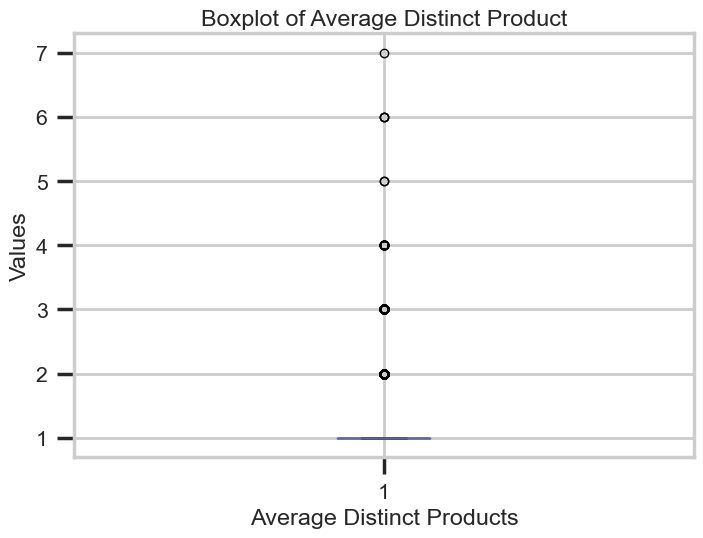

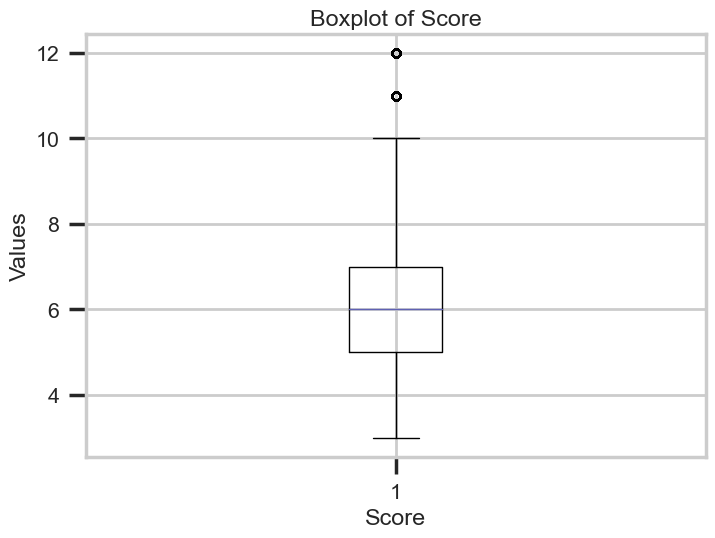

In [3]:
df = pd.read_csv("data_no_nulls_outliers.csv")

print(df.describe())
print(df.head())

#nulls and duplicates
print(df.isnull().sum().sort_values(ascending=False))
df=df.drop_duplicates()

#unique
print('It exists a total of '+ str(df.order_id.nunique()) +' unique order_id.')
print('It exists a total of '+ str(df.customer_unique_id.nunique()) +' unique customer_id.')

#date
df['bought_at'] = pd.to_datetime(df['bought_at']).dt.date
df['total'] = df['total_price'] + df['total_freight_value']
print(df.bought_at.max())
next_day = dt.date(2018, 1, 1)

#rfm analysis
rfm= df.groupby('customer_unique_id').agg({'bought_at': lambda date: (next_day - date.max()).days,
                                        'order_id': lambda order_id: order_id.nunique(),
                                        'total': lambda price: price.sum(),
                                        'quantity': lambda quantity: round(quantity.mean(), 0),
                                        'distinct_products_quantity': lambda distinct_products_quantity: round(distinct_products_quantity.mean(), 0),
                                        'total_price': lambda total_price: round(total_price.mean(), 2),
                                        'total_freight_value': lambda total_freight_value: round(total_freight_value.mean(), 2)
                                        })
print(rfm.head)

#change columns names and put the values correct
rfm.rename(columns={"bought_at": "recency", "order_id": "frequency", "total": "monetary", 
                    "total_price": "avg_price", "total_freight_value": "avg_freight_value", 
                    "quantity": "avg_quantity", "distinct_products_quantity": "avg_distinct_products"},inplace=True,)
rfm['recency'] = rfm['recency'].astype(int)
rfm = rfm[rfm["monetary"] > 0]
print(rfm.head())

#calculate the quartiles
quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

rfm['R_quartil'] = rfm['recency'].apply(RScore, args=('recency', quantiles))
rfm['F_quartil'] = rfm['frequency'].apply(FMScore, args=('frequency', quantiles))
rfm['M_quartil'] = rfm['monetary'].apply(FMScore, args=('monetary', quantiles))

#calculate the the score
rfm['score'] = rfm[['R_quartil','F_quartil','M_quartil']].sum(axis=1).astype(int)
print(rfm.head())

#the best costumers
print(rfm[rfm['score']== 15].sort_values('monetary', ascending=False).head())
print(rfm[rfm['score']==15].count())

#characterization of the customers
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
print(rfm.head())

#plot the previous iteration
plt.figure(figsize=(10,5))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(x=rfm['level'])
plt.show()

print(rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']}))

print(rfm.describe())

#Outliers
plt.boxplot(rfm.recency)
#Q1 = rfm.recency.quantile(0.25)
#Q3 = rfm.recency.quantile(0.75)
#IQR = Q3 - Q1
#rfm = rfm[(rfm.recency >= Q1 - 3*IQR) & (rfm.recency <= Q3 + 3*IQR)]
plt.title("Boxplot of Recency")
plt.xlabel("Recency")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.frequency)
#Q1 = rfm.frequency.quantile(0.25)
#Q3 = rfm.frequency.quantile(0.75)
#IQR = Q3 - Q1
#rfm = rfm[(rfm.frequency >= Q1 - 3*IQR) & (rfm.frequency <= Q3 + 3*IQR)]
plt.title("Boxplot of Frequency")
plt.xlabel("Frequency")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.monetary)
#Q1 = rfm.monetary.quantile(0.25)
#Q3 = rfm.monetary.quantile(0.75)
#IQR = Q3 - Q1
#rfm = rfm[(rfm.monetary >= (Q1 - 3*IQR)) & (rfm.monetary <= (Q3 + 3*IQR))]
plt.title("Boxplot of Monetary")
plt.xlabel("Monetary")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.avg_price)
plt.title("Boxplot of Average Price")
plt.xlabel("Average Price")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.avg_freight_value)
plt.title("Boxplot of Average Freight Value")
plt.xlabel("Average Freight Value")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.avg_quantity)
plt.title("Boxplot of Quantity")
plt.xlabel("Average Quantity")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.avg_distinct_products)
plt.title("Boxplot of Average Distinct Product")
plt.xlabel("Average Distinct Products")
plt.ylabel("Values")
plt.show()

plt.boxplot(rfm.score)
plt.title("Boxplot of Score")
plt.xlabel("Score")
plt.ylabel("Values")
plt.show()

#save file
rfm.to_csv('rfm.csv')

                 customer_unique_id  recency  frequency  monetary  \
0  0000f46a3911fa3c0805444483337064      297          1     86.22   
1  0000f6ccb0745a6a4b88665a16c9f078       81          1     43.62   
2  0004aac84e0df4da2b147fca70cf8255       48          1    196.89   
3  0005e1862207bf6ccc02e4228effd9a0      303          1    150.12   
4  0006fdc98a402fceb4eb0ee528f6a8d4      167          1     29.00   

   avg_quantity  avg_distinct_products  avg_price  avg_freight_value  score  
0           1.0                    1.0      69.00              17.22      4  
1           1.0                    1.0      25.99              17.63      5  
2           1.0                    1.0     180.00              16.89      9  
3           1.0                    1.0     135.00              15.12      5  
4           1.0                    1.0      13.90              15.10      4  


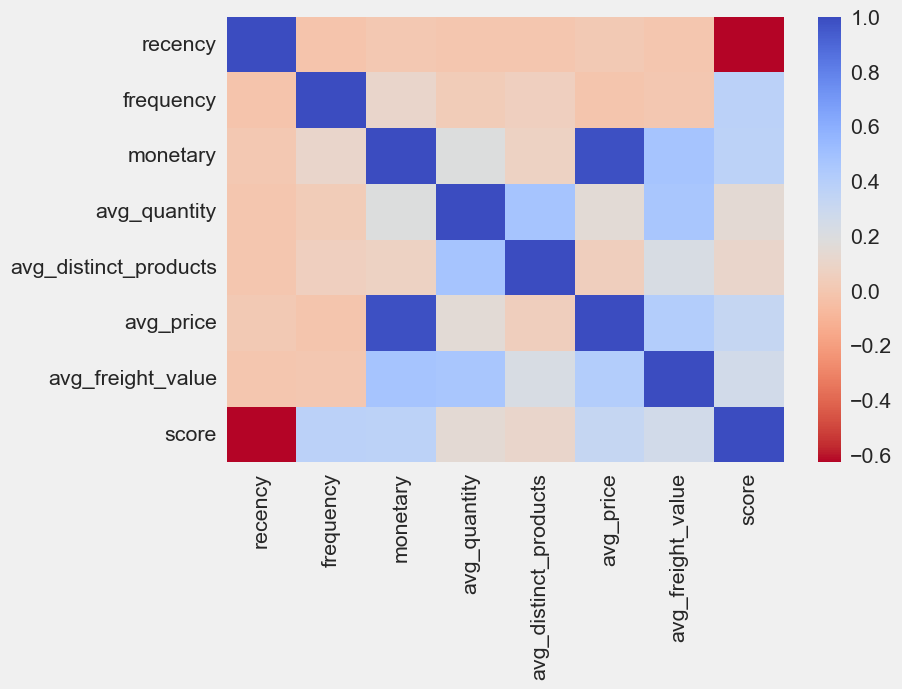

                                  recency  frequency  monetary  avg_quantity  \
customer_unique_id                                                             
0000f46a3911fa3c0805444483337064      297          1     86.22           1.0   
0000f6ccb0745a6a4b88665a16c9f078       81          1     43.62           1.0   
0004aac84e0df4da2b147fca70cf8255       48          1    196.89           1.0   
0005e1862207bf6ccc02e4228effd9a0      303          1    150.12           1.0   
0006fdc98a402fceb4eb0ee528f6a8d4      167          1     29.00           1.0   

                                  avg_distinct_products  avg_price  \
customer_unique_id                                                   
0000f46a3911fa3c0805444483337064                    1.0      69.00   
0000f6ccb0745a6a4b88665a16c9f078                    1.0      25.99   
0004aac84e0df4da2b147fca70cf8255                    1.0     180.00   
0005e1862207bf6ccc02e4228effd9a0                    1.0     135.00   
0006fdc98a402fceb4e

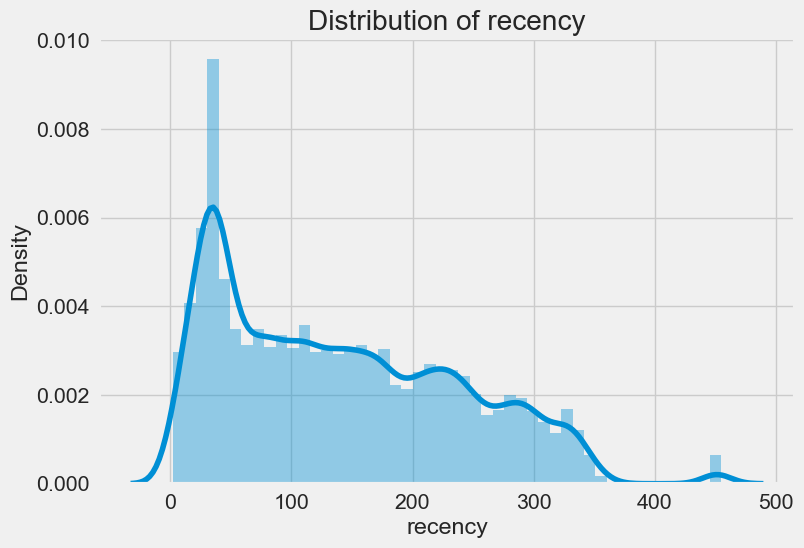

frequency's: Skew: 8.405369811658144


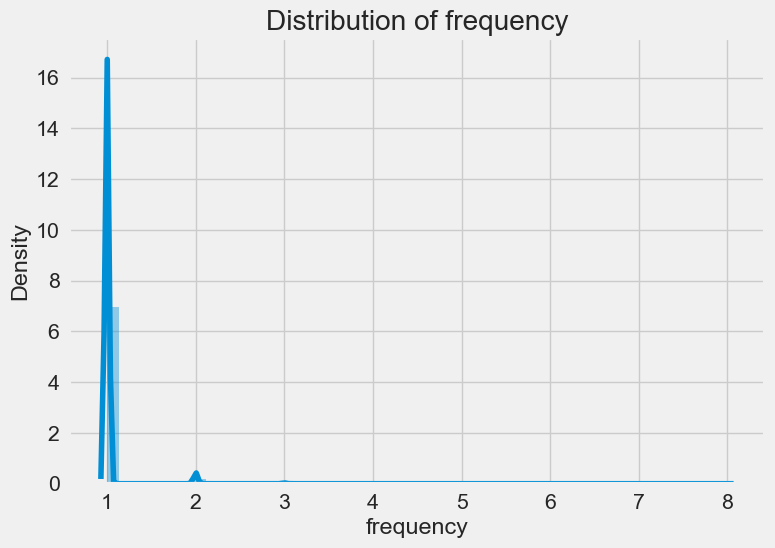

monetary's: Skew: 11.434041518087962


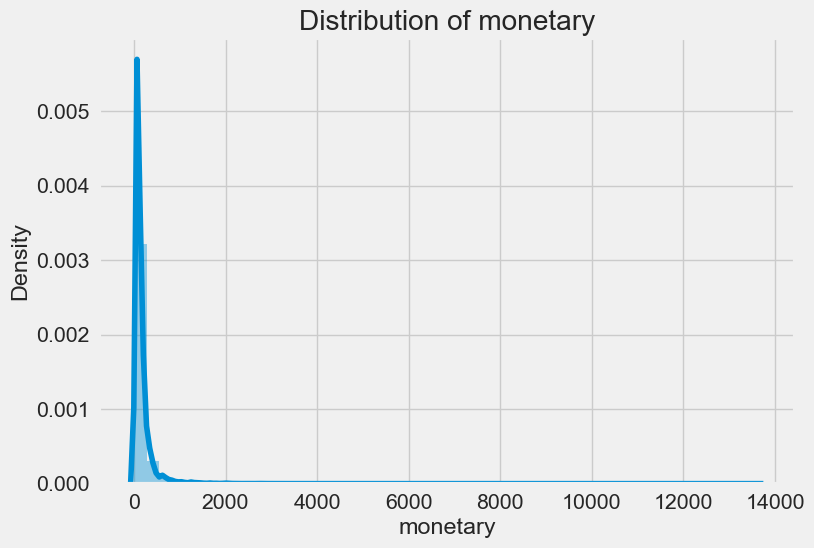

avg_quantity's: Skew: 8.038564851306484


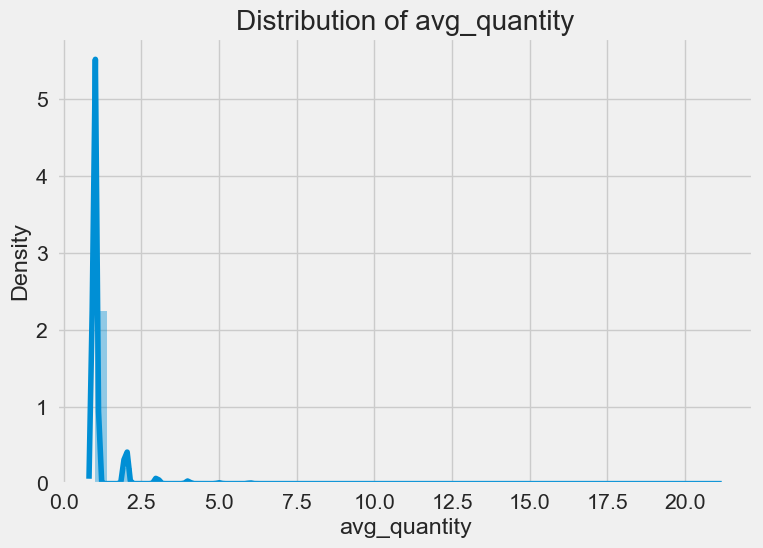

avg_distinct_products's: Skew: 7.535761923986612


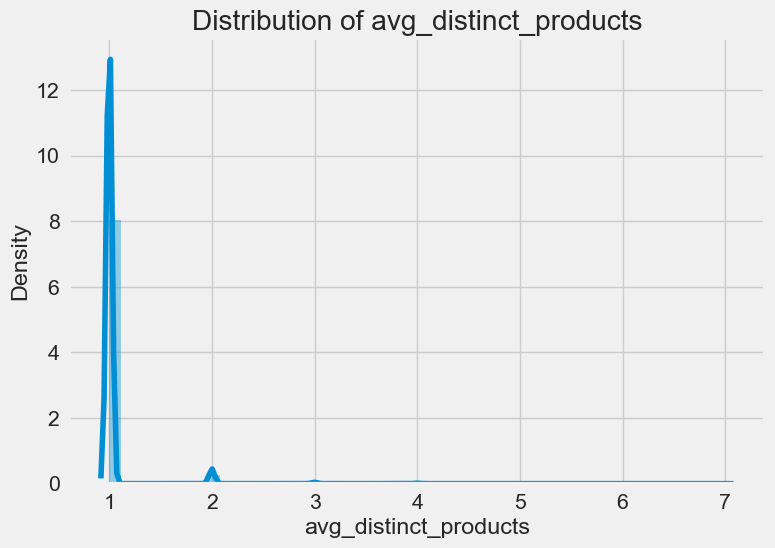

avg_price's: Skew: 12.152528876666612


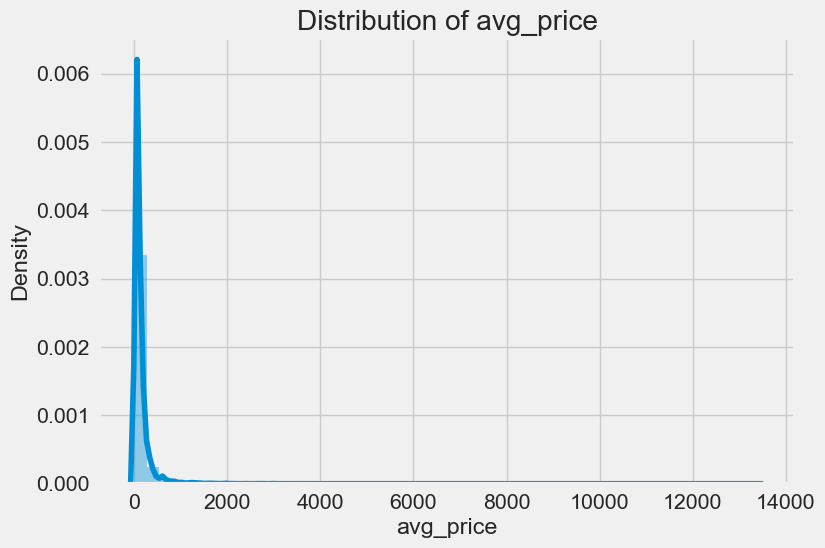

avg_freight_value's: Skew: 8.95614473328348


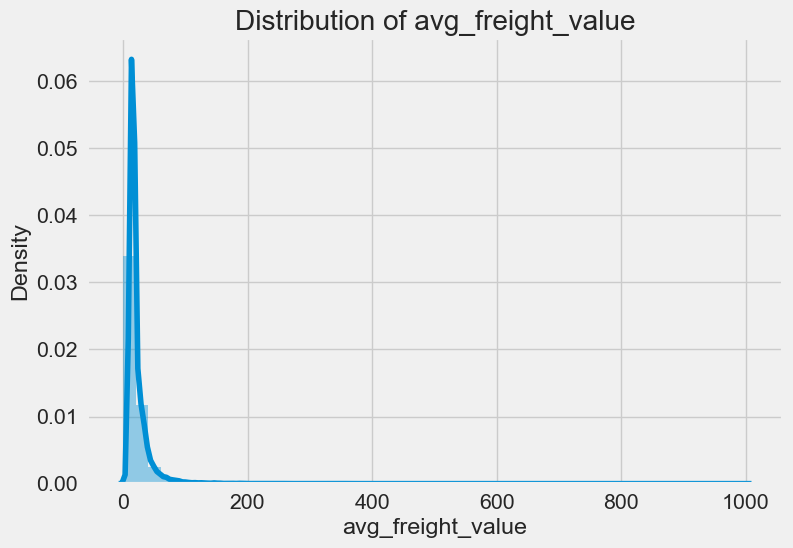

score's: Skew: 0.3091050170597377


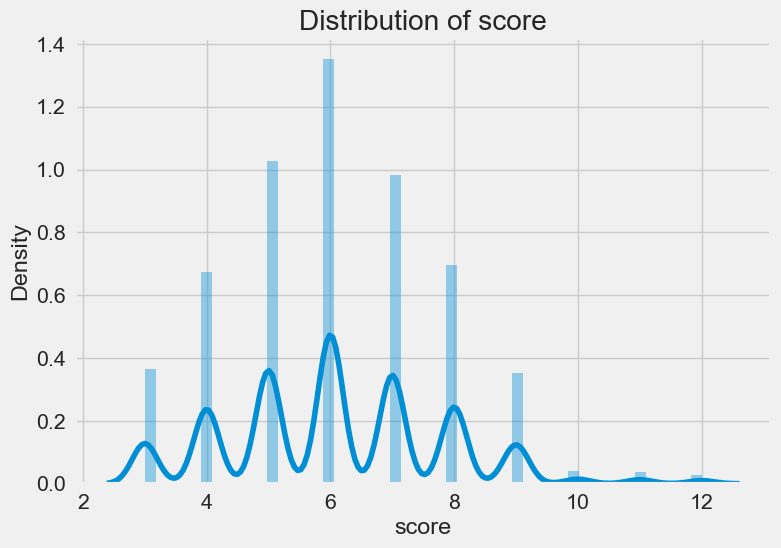

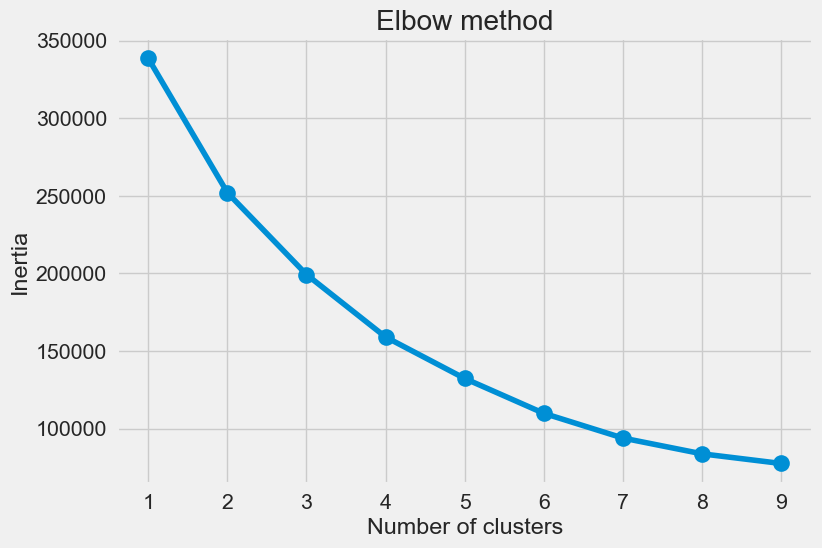

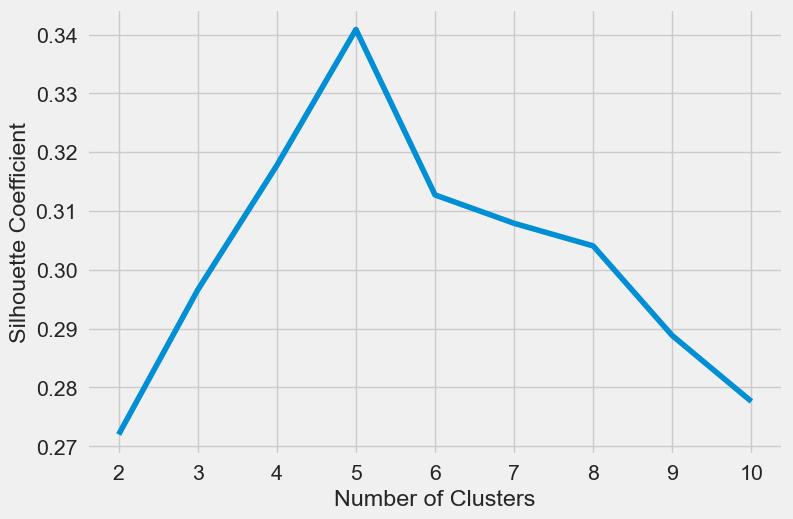

In [8]:
data = pd.read_csv("rfm.csv")
rfm = data
rfm = rfm.drop(['level'], axis=1)
rfm = rfm.drop(['R_quartil'], axis=1)
rfm = rfm.drop(['M_quartil'], axis=1)
rfm = rfm.drop(['F_quartil'], axis=1)
print(rfm.head())

#correlation
corrDf = rfm.corr()
sns.heatmap(corrDf, 
        xticklabels=corrDf.columns,
        yticklabels=corrDf.columns, cmap='coolwarm_r')
plt.show()

#k_means
rfm.set_index('customer_unique_id', inplace = True)
print(rfm.head())

check_skew(rfm,'recency')
check_skew(rfm,'frequency')
check_skew(rfm,'monetary')
check_skew(rfm,'avg_quantity')
check_skew(rfm,'avg_distinct_products')
check_skew(rfm,'avg_price')
check_skew(rfm,'avg_freight_value')
check_skew(rfm,'score')

#transform the data
pt = PowerTransformer(method='yeo-johnson', standardize=True)
rfm = pt.fit_transform(rfm)

scaler = StandardScaler()
RFM_Table_scaled = scaler.fit_transform(rfm)

inertias=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(RFM_Table_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

silhouette_coefficients = []
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(RFM_Table_scaled)
   score = silhouette_score(RFM_Table_scaled, kmeans.labels_)
   silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

                 customer_unique_id  recency  frequency  monetary  \
0  0000f46a3911fa3c0805444483337064      297          1     86.22   
1  0000f6ccb0745a6a4b88665a16c9f078       81          1     43.62   
2  0004aac84e0df4da2b147fca70cf8255       48          1    196.89   
3  0005e1862207bf6ccc02e4228effd9a0      303          1    150.12   
4  0006fdc98a402fceb4eb0ee528f6a8d4      167          1     29.00   

   avg_quantity  avg_distinct_products  avg_price  avg_freight_value  \
0           1.0                    1.0      69.00              17.22   
1           1.0                    1.0      25.99              17.63   
2           1.0                    1.0     180.00              16.89   
3           1.0                    1.0     135.00              15.12   
4           1.0                    1.0      13.90              15.10   

   R_quartil  F_quartil  M_quartil  score      level  cluster  
0          1          1          2      4  Score 4-6        1  
1          3          1 

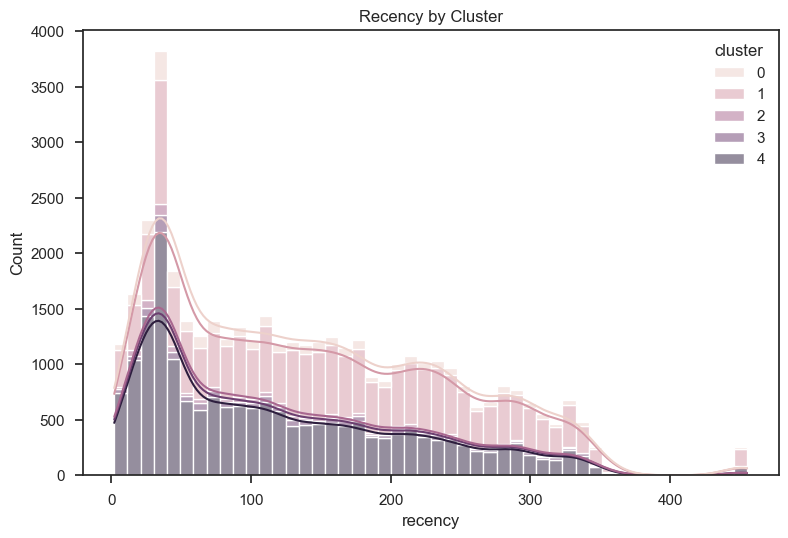

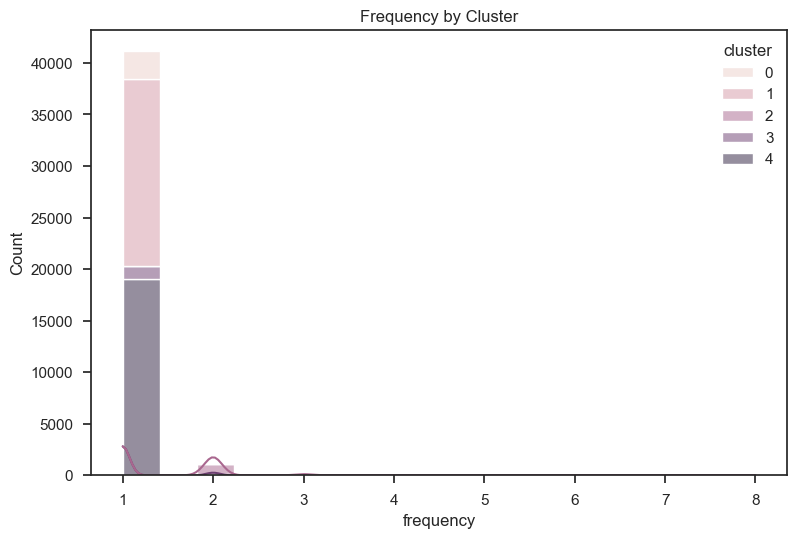

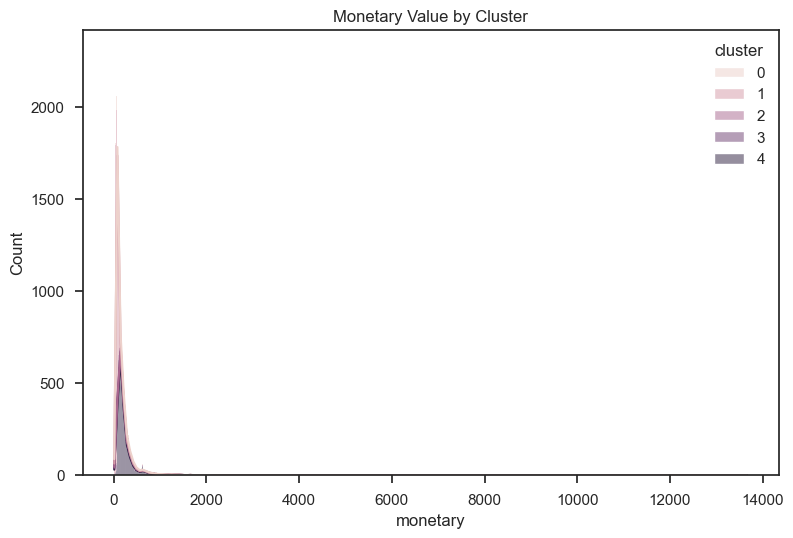

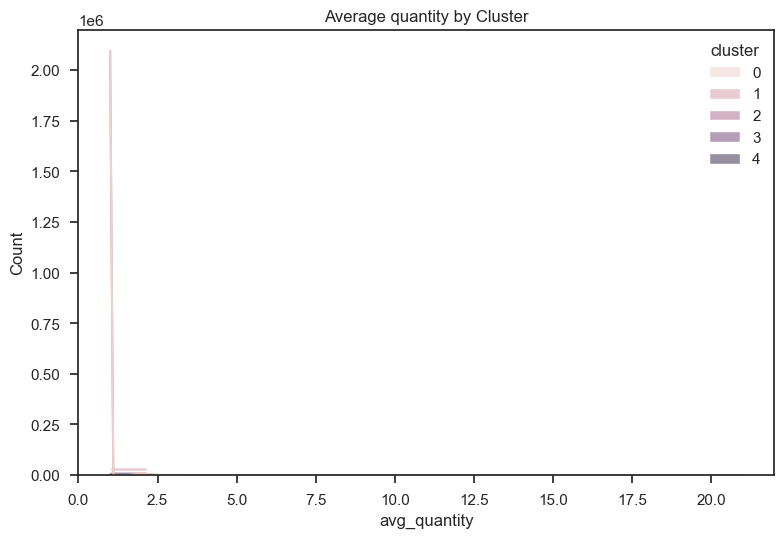

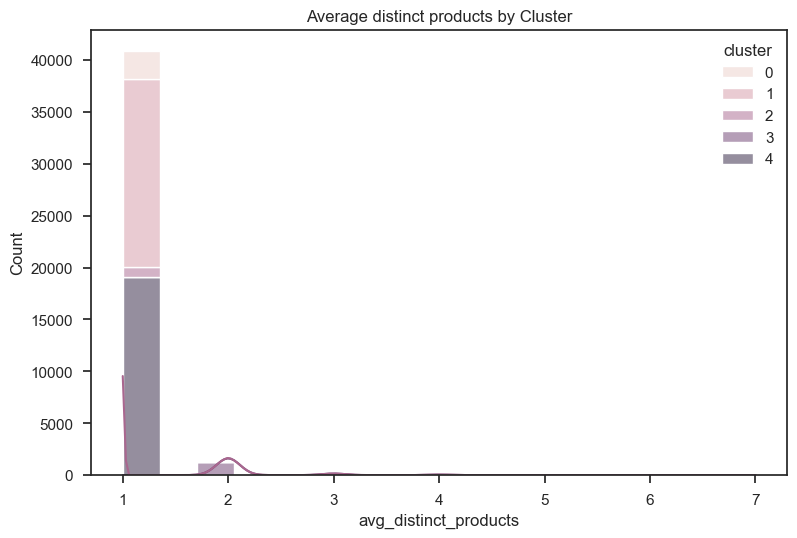

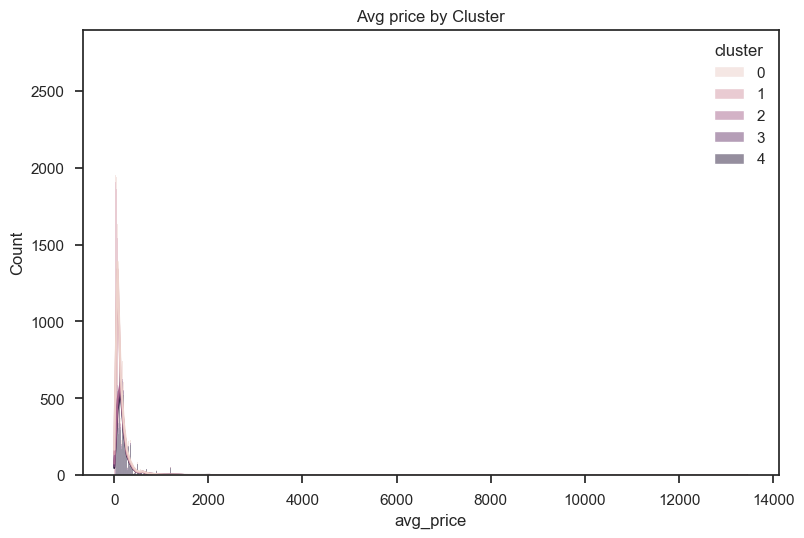

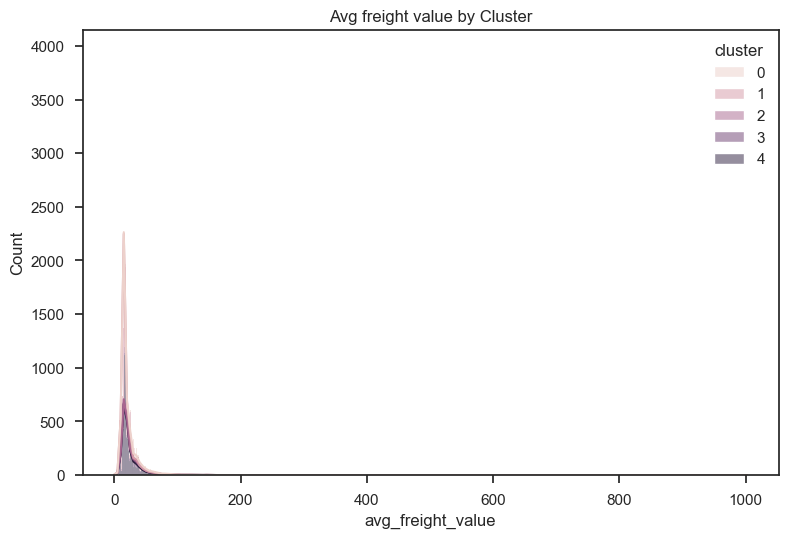

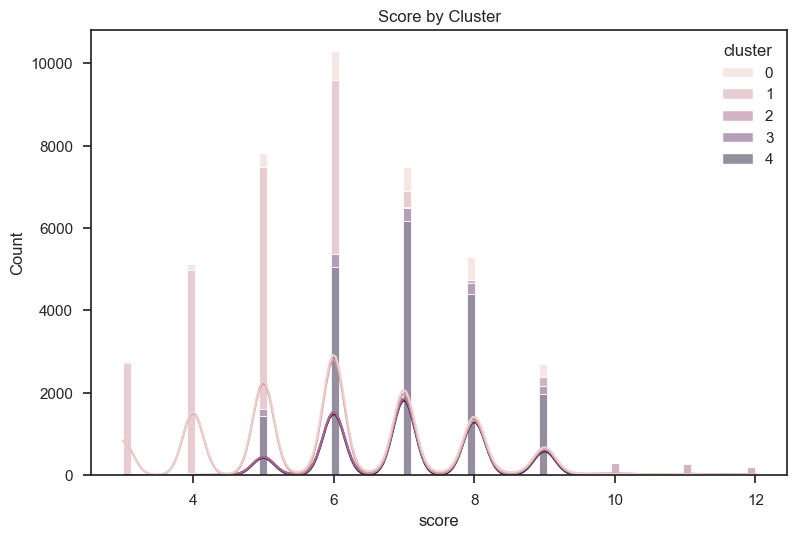

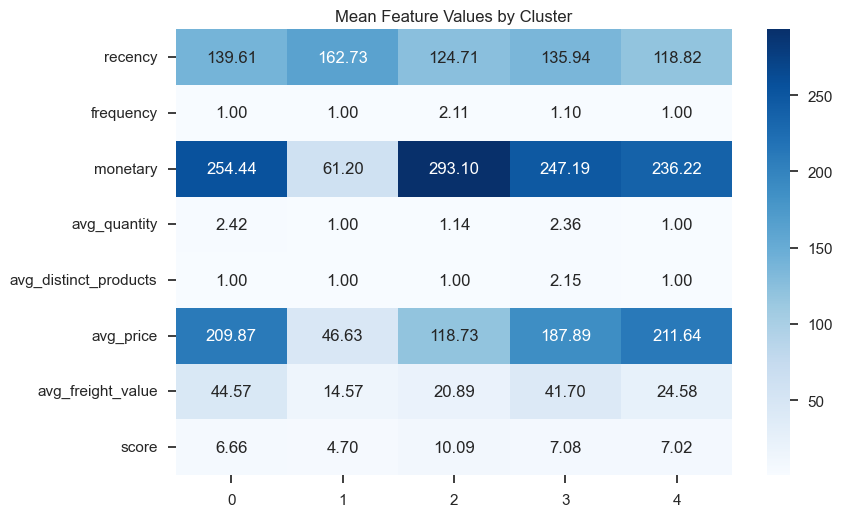

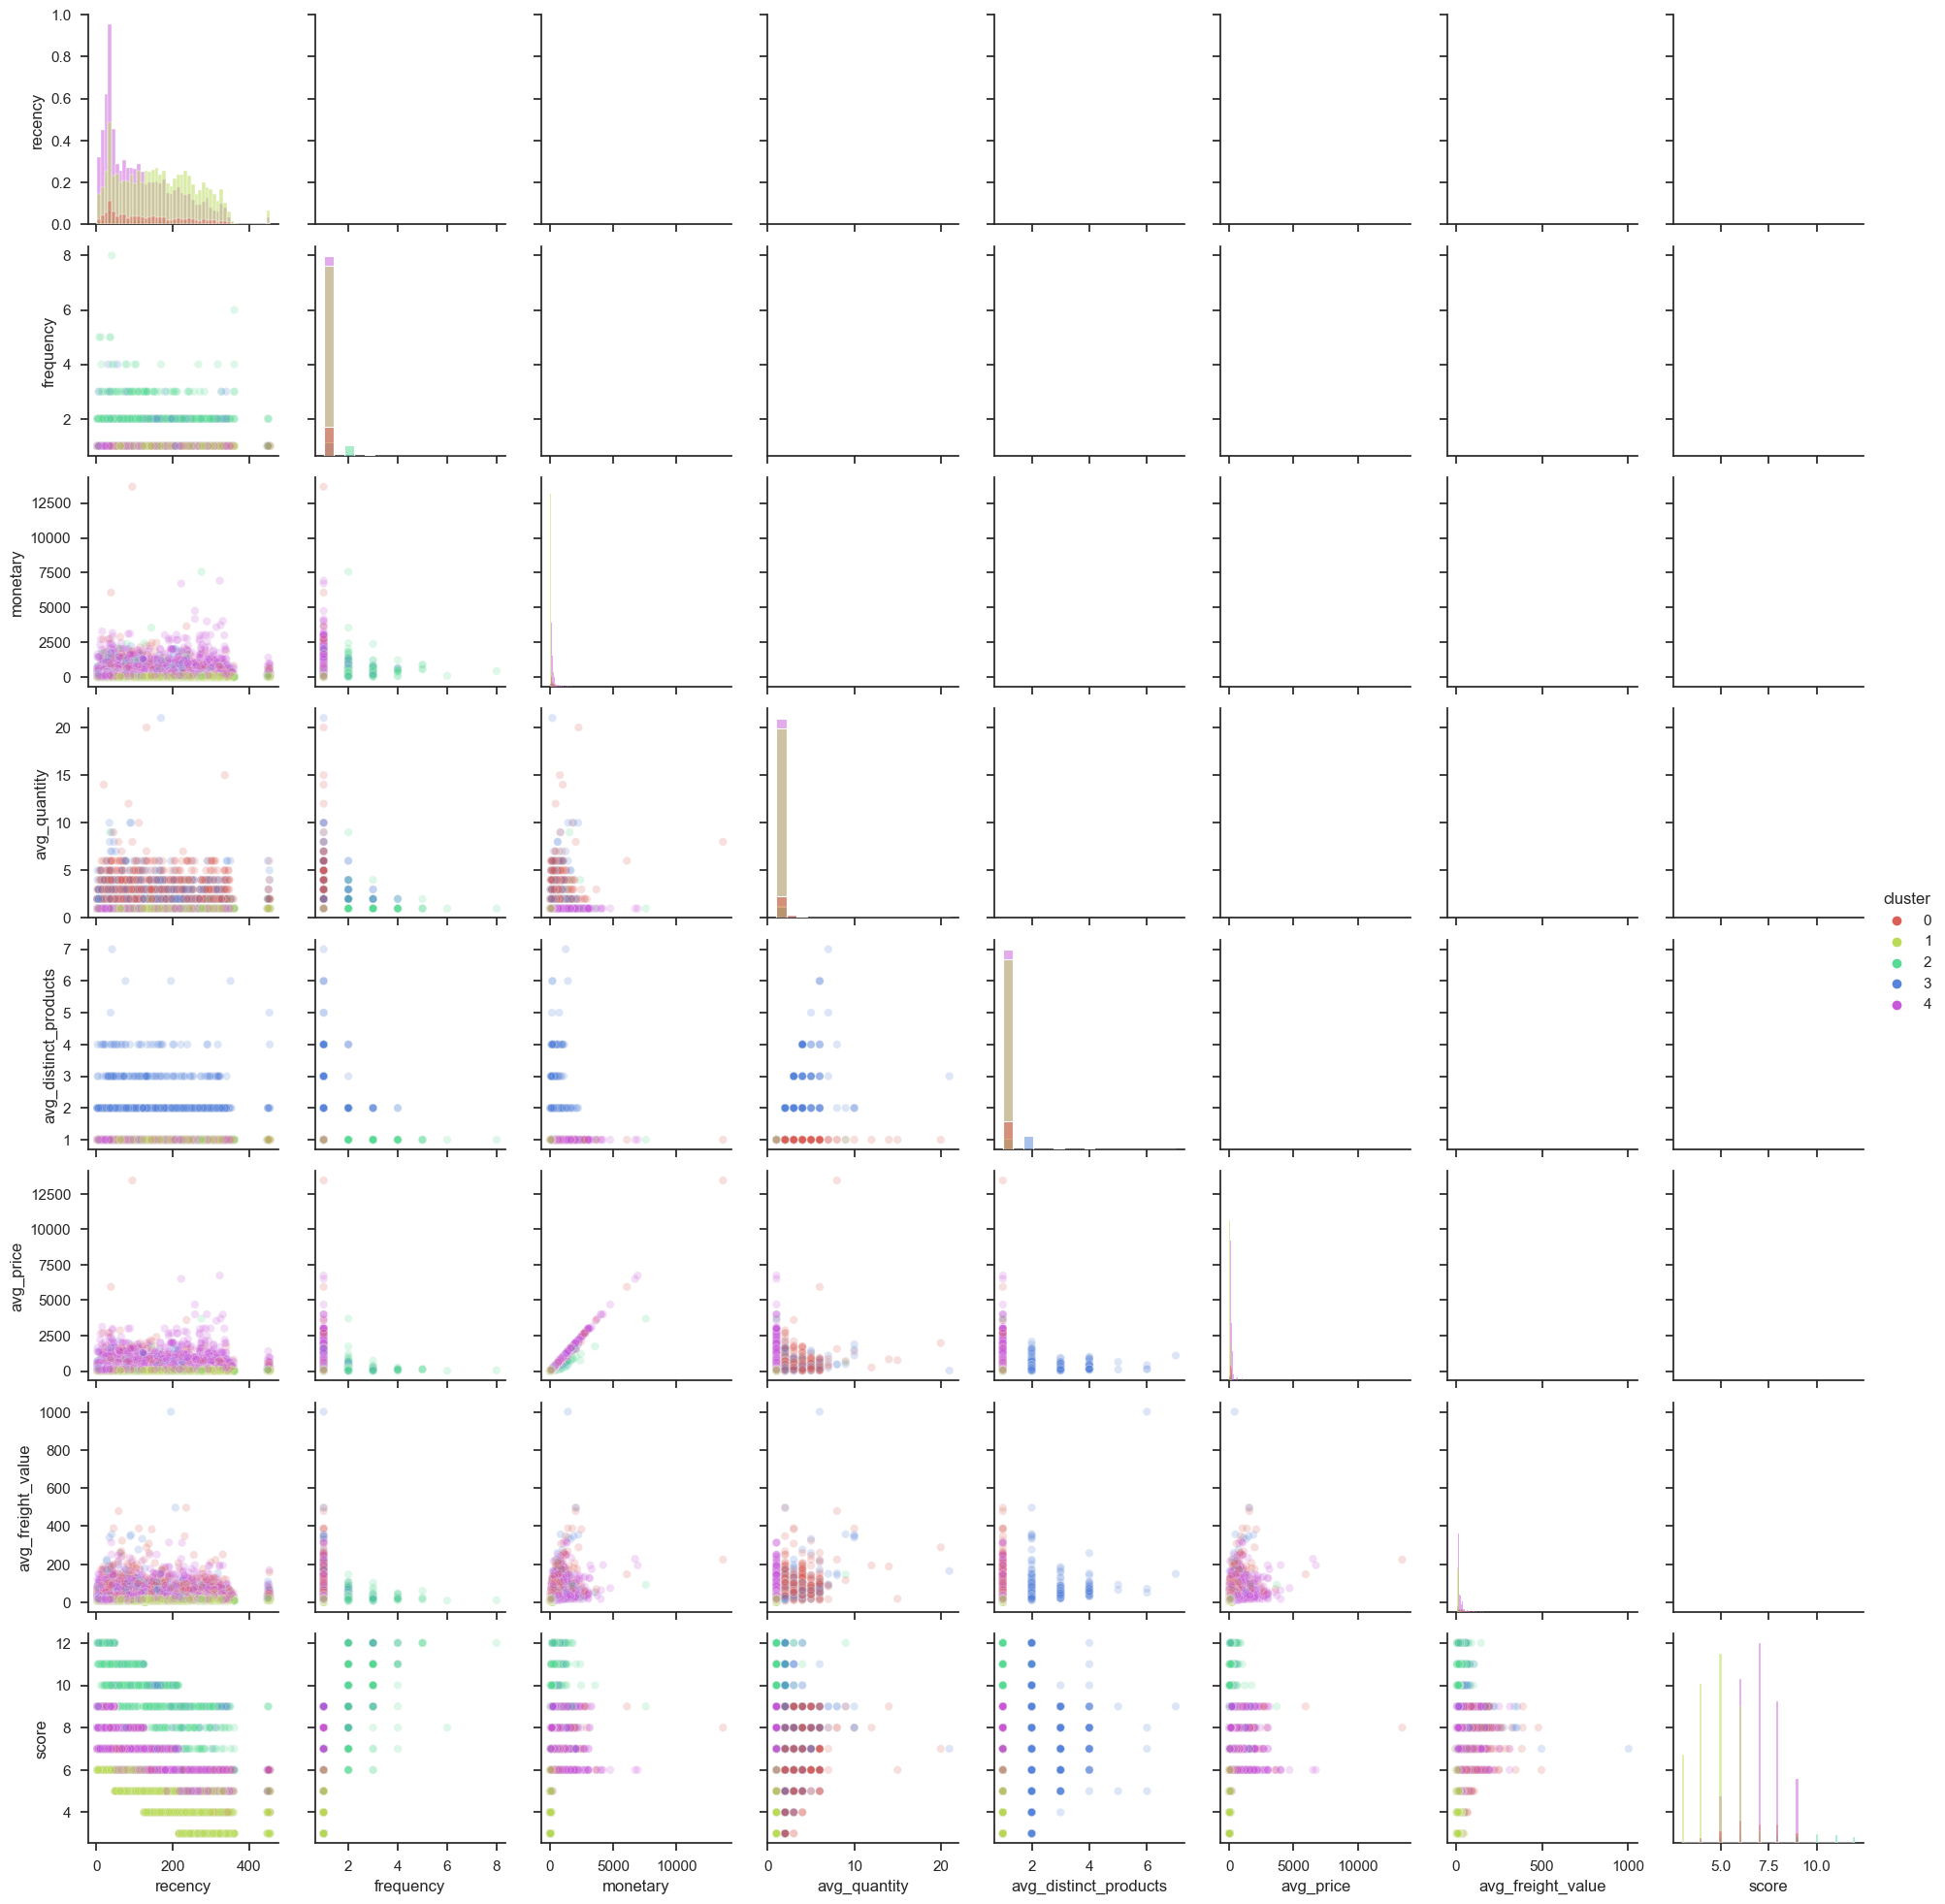

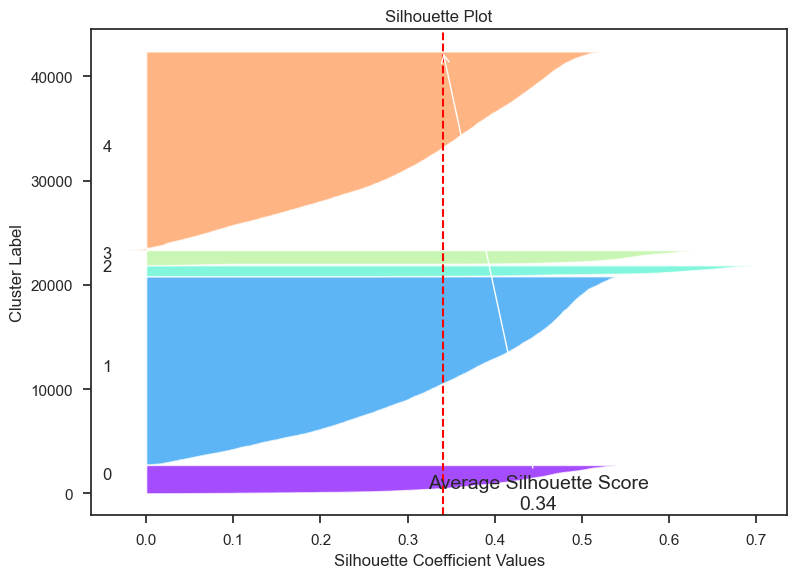

                 customer_unique_id      level  cluster  metrics  value
0  0000f46a3911fa3c0805444483337064  Score 4-6        1  recency  297.0
1  0000f6ccb0745a6a4b88665a16c9f078  Score 4-6        1  recency   81.0
2  0004aac84e0df4da2b147fca70cf8255  Score 7-9        4  recency   48.0
3  0005e1862207bf6ccc02e4228effd9a0  Score 4-6        4  recency  303.0
4  0006fdc98a402fceb4eb0ee528f6a8d4  Score 4-6        1  recency  167.0


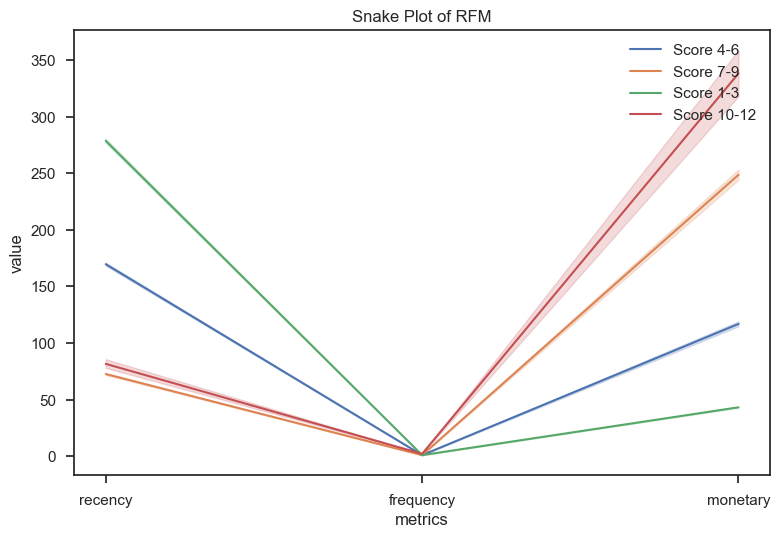

<Figure size 2000x2000 with 0 Axes>

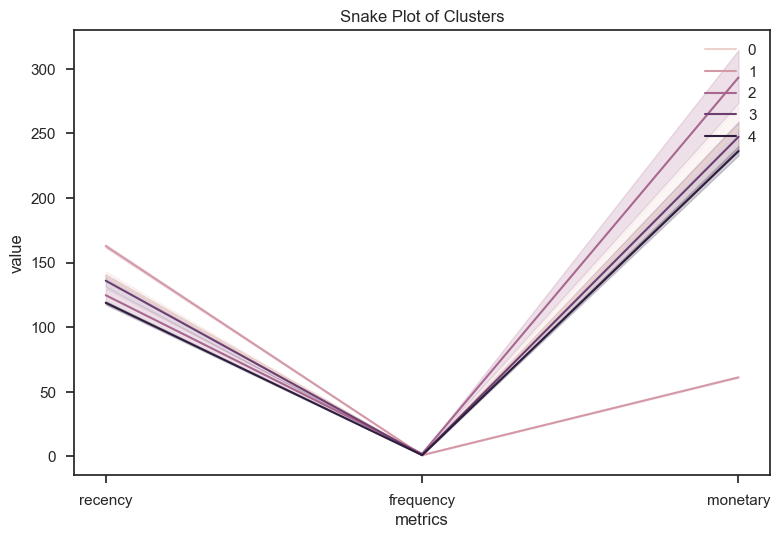

<Figure size 2000x2000 with 0 Axes>

                 Feature          WCSS
6      avg_freight_value  4.347629e+03
5              avg_price  3.401676e+03
2               monetary  3.111630e+03
7                  score  2.381386e+03
0                recency  2.258936e+03
3           avg_quantity  4.834763e-14
1              frequency  2.147643e-23
4  avg_distinct_products  4.531858e-24


In [10]:
# Load data from CSV file into a Pandas DataFrame
data = pd.read_csv("rfm.csv")
rfm = data
rfm = rfm.drop(['R_quartil'], axis=1)
rfm = rfm.drop(['M_quartil'], axis=1)
rfm = rfm.drop(['F_quartil'], axis=1)
rfm = rfm.drop(['level'], axis=1)
rfm = rfm.set_index('customer_unique_id')

#data transformation
pt = PowerTransformer(method='yeo-johnson', standardize=True)
rfm = pt.fit_transform(rfm)

scaler = StandardScaler()
rfm = scaler.fit_transform(rfm)

# Define number of clusters
k = 5

# Create KMeans object
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(rfm)

# Get the centroids and labels for each data point
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Get the cluster labels and add them to the original DataFrame
data['cluster'] = kmeans.labels_

# Print the resulting DataFrame with cluster labels
print(data.head())

#save file with clusters
data.to_csv('k_means.csv', index=False)
plot = data.loc[:, ['customer_unique_id', 'recency', 'frequency', 'monetary', 'level', 'cluster']]
data = data.drop(['R_quartil'], axis=1)
data = data.drop(['M_quartil'], axis=1)
data = data.drop(['F_quartil'], axis=1)
data = data.drop(['level'], axis=1)

# Create histograms of the feature values for each cluster
sns.histplot(data=data, x='recency', hue='cluster', kde=True, multiple='stack')
plt.title('Recency by Cluster')
plt.show()

sns.histplot(data=data, x='frequency', hue='cluster', kde=True, multiple='stack')
plt.title('Frequency by Cluster')
plt.show()

sns.histplot(data=data, x='monetary', hue='cluster', kde=True, multiple='stack')
plt.title('Monetary Value by Cluster')
plt.show()

sns.histplot(data=data, x='avg_quantity', hue='cluster', kde=True, multiple='stack')
plt.title('Average quantity by Cluster')
plt.show()

sns.histplot(data=data, x='avg_distinct_products', hue='cluster', kde=True, multiple='stack')
plt.title('Average distinct products by Cluster')
plt.show()

sns.histplot(data=data, x='avg_price', hue='cluster', kde=True, multiple='stack')
plt.title('Avg price by Cluster')
plt.show()

sns.histplot(data=data, x='avg_freight_value', hue='cluster', kde=True, multiple='stack')
plt.title('Avg freight value by Cluster')
plt.show()

sns.histplot(data=data, x='score', hue='cluster', kde=True, multiple='stack')
plt.title('Score by Cluster')
plt.show()

# Create a heatmap of the mean feature values for each cluster
cluster_means = data.groupby('cluster').mean().reset_index()
sns.heatmap(cluster_means[['recency', 'frequency', 'monetary', 'avg_quantity', 'avg_distinct_products','avg_price',
                           'avg_freight_value','score']].transpose(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Mean Feature Values by Cluster')
plt.show()

# Create scatter plot matrix
#scatter_matrix(data, alpha=0.2, figsize=(20,20), diagonal='hist')
#plt.show()

sns.set(style="ticks")
cluster_colors = sns.color_palette('hls', n_colors=len(data['cluster'].unique()))
g = sns.PairGrid(data, hue='cluster', palette=cluster_colors, diag_sharey=False)
g.map_lower(sns.scatterplot, alpha=0.2)
g.map_diag(sns.histplot)
g.add_legend()
g.fig.set_size_inches(20, 20)

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(rfm, labels)

# Calculate average silhouette score for the whole dataset
silhouette_avg = silhouette_score(rfm, labels)

# Create bar plot of silhouette scores for each cluster
fig, ax = plt.subplots(figsize=(8,6))
y_lower = 10
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.rainbow(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# Plot the average silhouette score as a vertical line
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.annotate('Average Silhouette Score\n{0:.2f}'.format(silhouette_avg), xytext=(0.45, 0.8),
            xy=(silhouette_avg, y_lower + 50), fontsize=14, ha='center', va='center',
            arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

rfm_melted = pd.melt(frame= plot, id_vars= ['customer_unique_id', 'level', 'cluster'], var_name = 'metrics', value_name = 'value')
print(rfm_melted.head())

sns.lineplot(x = 'metrics', y = 'value', hue = 'level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')
plt.figure(figsize=(20,20))
plt.show()

sns.lineplot(x = 'metrics', y = 'value', hue = 'cluster', data = rfm_melted)
plt.title('Snake Plot of Clusters')
plt.legend(loc = 'upper right')
plt.figure(figsize=(20,20))
plt.show()

# Create empty list to store WCSS for each feature
wcss = []

feature_cols = ['recency','frequency','monetary','avg_quantity','avg_distinct_products','avg_price','avg_freight_value','score']
# Calculate WCSS for each feature
for i in range(8):
    kmeans_feature = KMeans(n_clusters=5, random_state=0)
    kmeans_feature.fit(rfm[:, i].reshape(-1, 1))
    wcss.append(kmeans_feature.inertia_)

# Create a pandas DataFrame to display the results
df = pd.DataFrame({'Feature': feature_cols, 'WCSS': wcss})
df = df.sort_values(by='WCSS', ascending=False)
print(df)

Number of customers not in the other dataset: 41756
Number of customers in the other dataset: 568


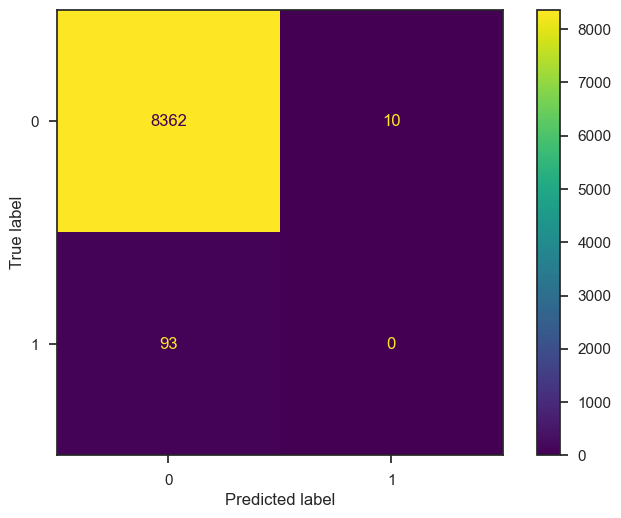

Accuracy: 0.9878322504430006
Recall/Sensitivity: 0.0
Specificity: 0.9988055422838031
Precision: 0.0
F1 score: 0.0


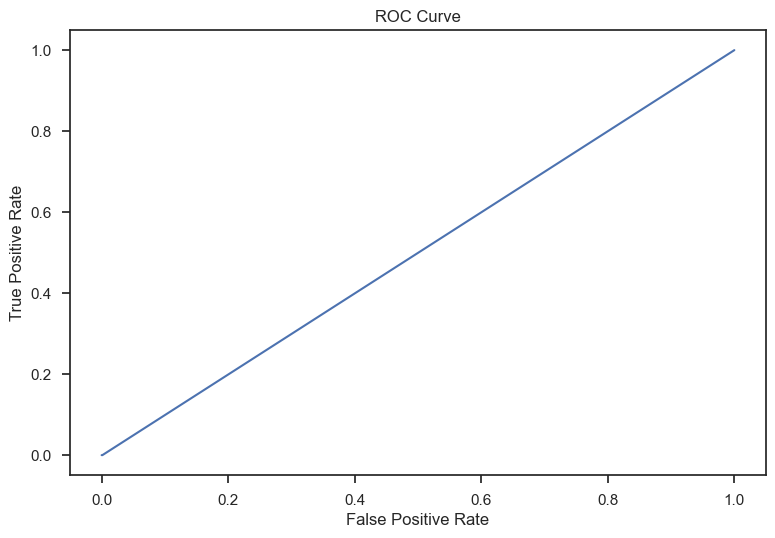

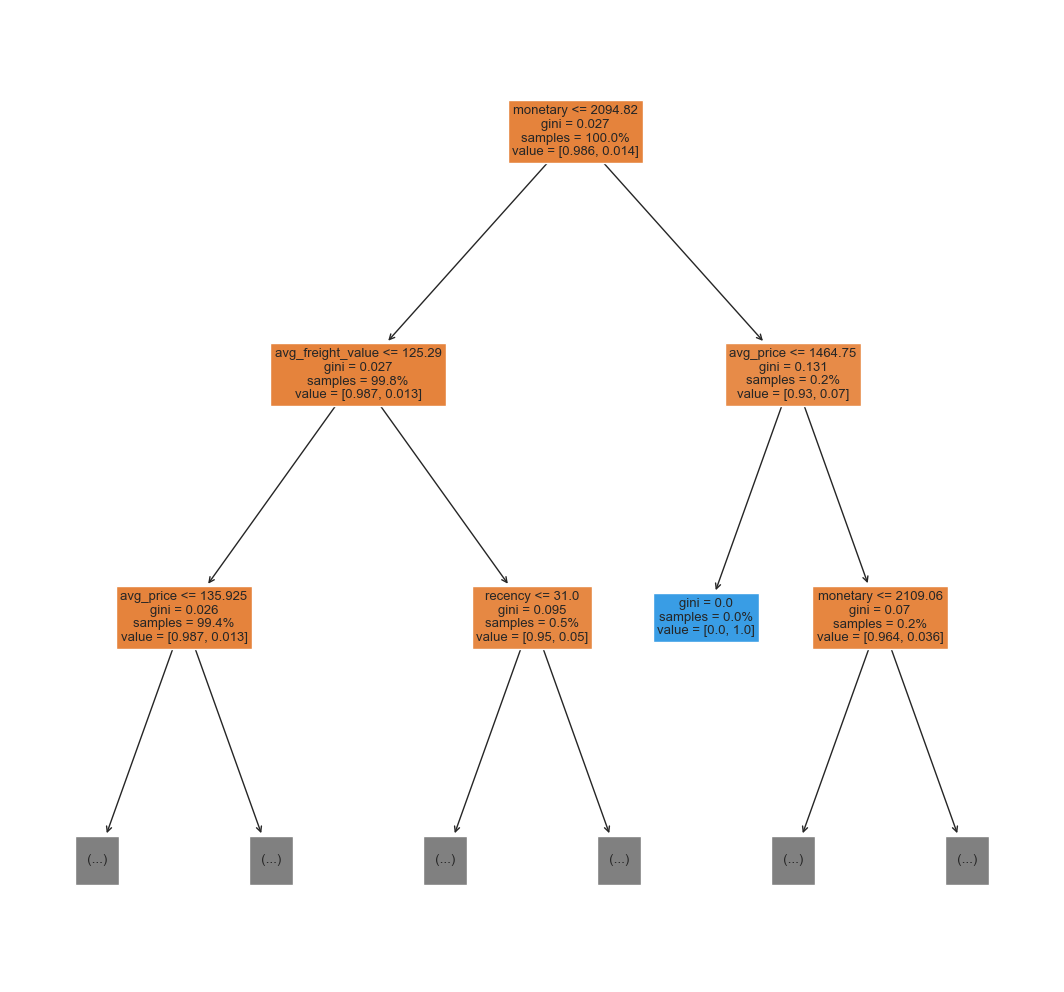

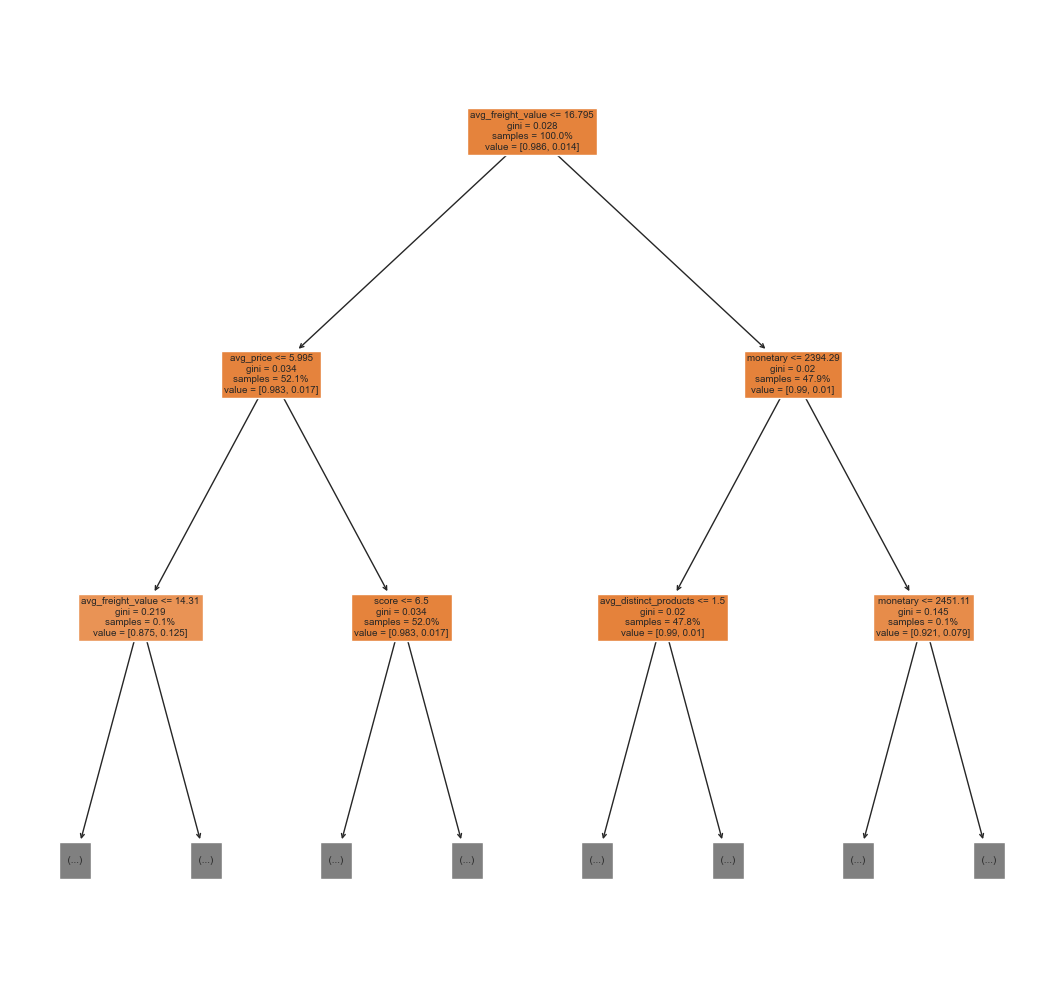

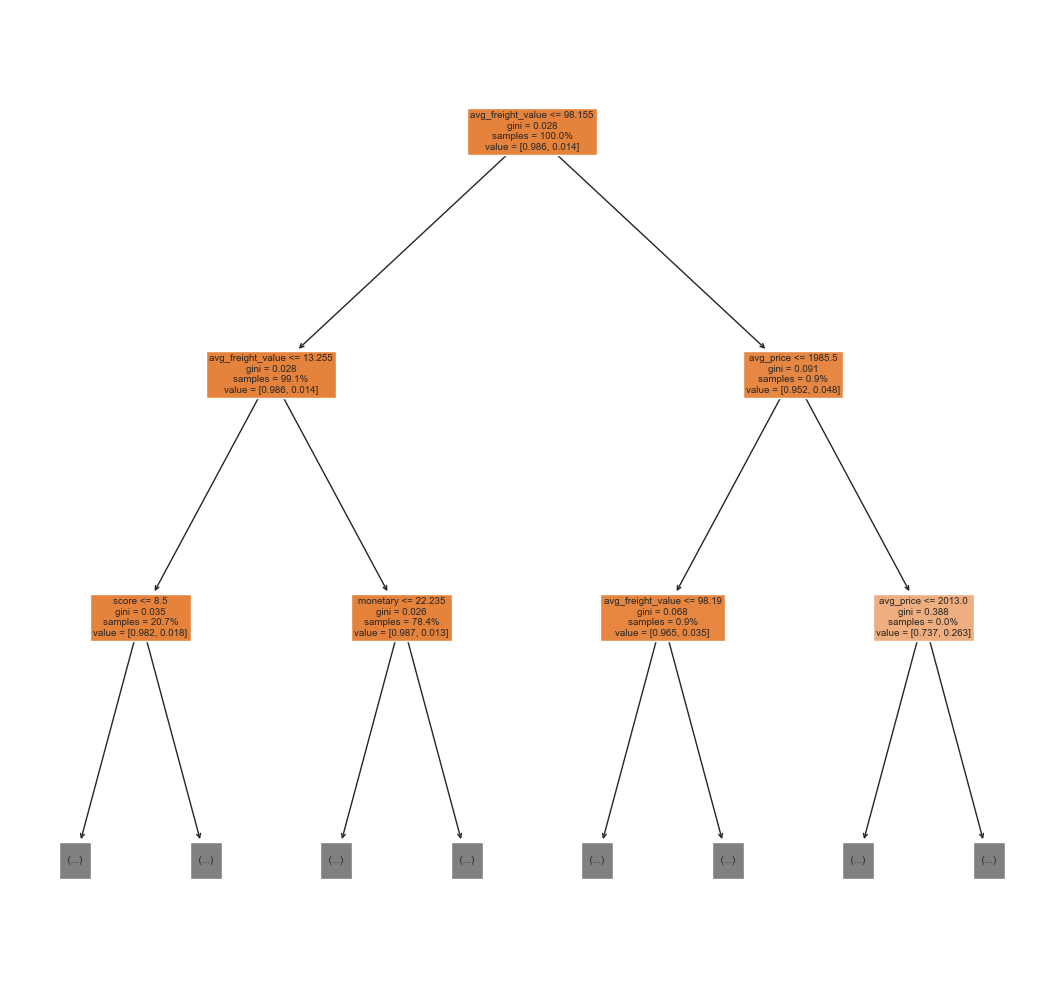

RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, random_state=0)
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}


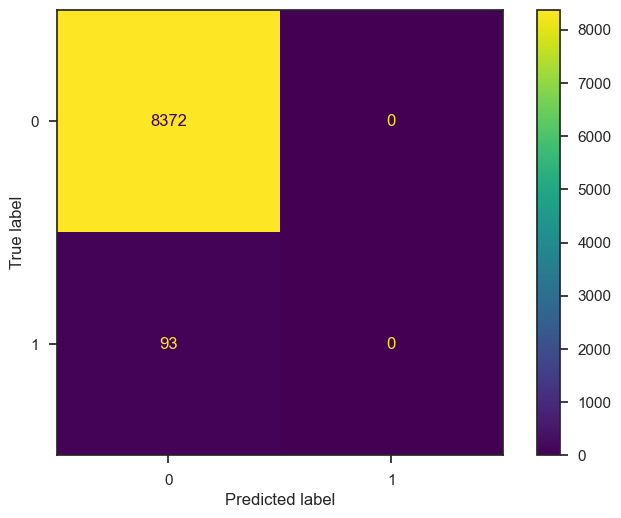

Accuracy: 0.9890135853514471
Recall/Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
F1 score: 0.0


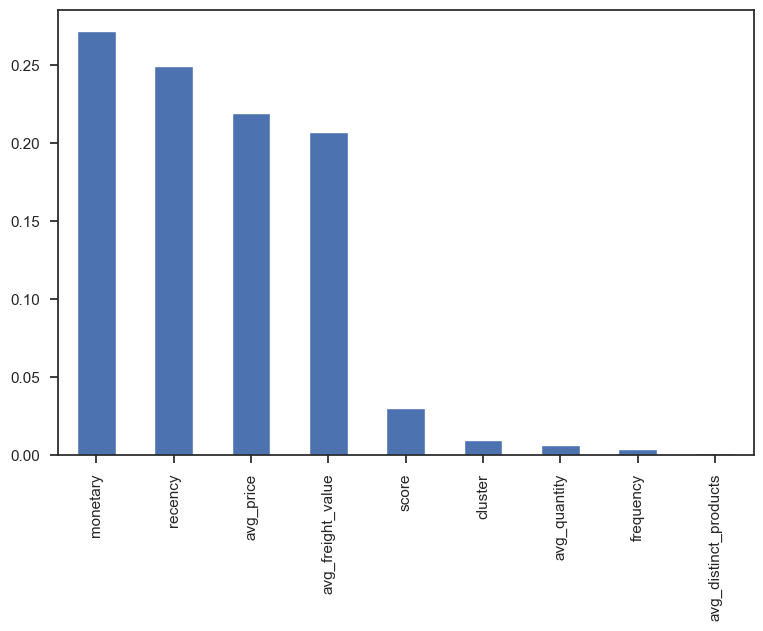

In [16]:
# load and treat dataset
data = pd.read_csv('k_means.csv')
label=data
label = label.drop(['R_quartil'], axis=1)
label = label.drop(['M_quartil'], axis=1)
label = label.drop(['F_quartil'], axis=1)
label = label.drop(['level'], axis=1)

# Load the other dataset to compare with
future = pd.read_csv('future.csv')

# Create a new column label with value 0
label['label'] = 0

# Set label to 1 for customer_ids present in future
label.loc[future['customer_unique_id'].isin(label['customer_unique_id']), 'label'] = 1

#save file
data['label']=label['label'] 
data.to_csv('label.csv', index=False)

# Count the number of 1s and 0s in label
counts = label['label'].value_counts()

# Print the counts
print("Number of customers not in the other dataset:", counts[0])
print("Number of customers in the other dataset:", counts[1])

#set index
label = label.set_index('customer_unique_id')

# Split the data into features (X) and target (y)
X = label.drop('label', axis=1)
y = label['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

# Generate predictions on the testing data
y_pred = rf.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Evaluate the model's performance using some common KPIs
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the KPIs
print(f"Accuracy: {accuracy}")
print(f"Recall/Sensitivity: {recall}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 score: {f1}")


# # plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    fig, ax = plt.subplots(figsize=(12, 12))
    plot_tree(tree, max_depth=2, feature_names=x_train.columns, filled=True, proportion=True, ax=ax)
    plt.show()


param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=0)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=0)

# Fit the random search object to the data
randmf = rand_search.fit(x_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_
print(best_rf)

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
best_rf_params = best_rf.get_params()

# Generate predictions with the best model
y_pred = randmf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Evaluate the model's performance using some common KPIs
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the KPIs
print(f"Accuracy: {accuracy}")
print(f"Recall/Sensitivity: {recall}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 score: {f1}")

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()

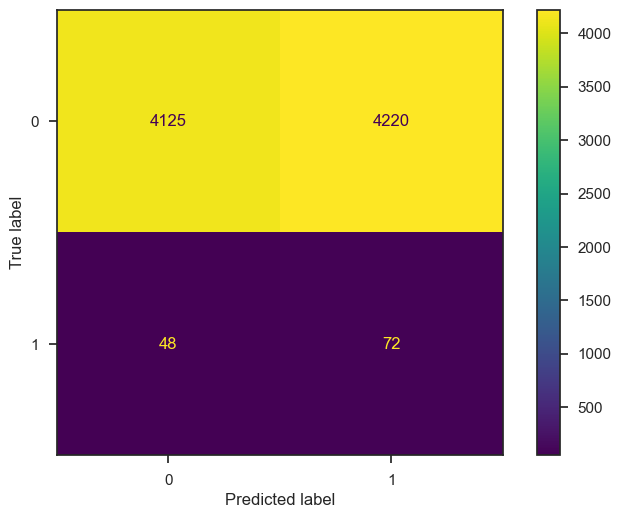

Accuracy: 0.49580626107501474
Recall/Sensitivity: 0.6
Specificity: 0.49430796884361894
Precision: 0.016775396085740912
F1 score: 0.03263825929283771


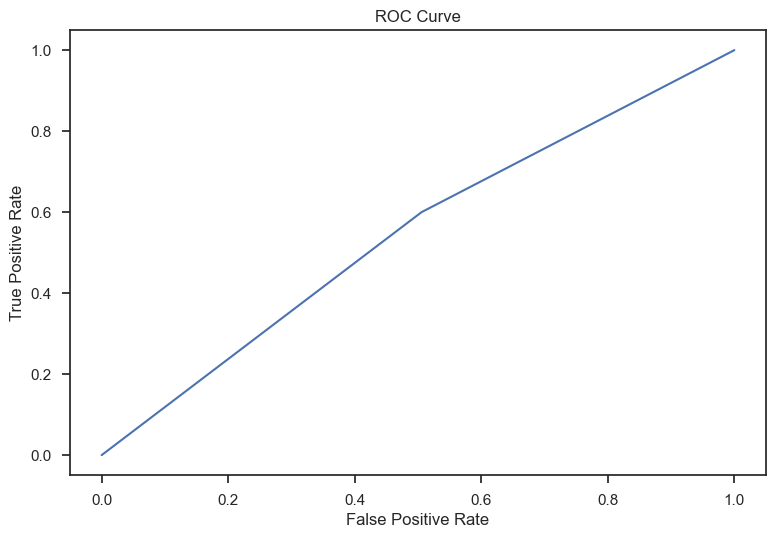

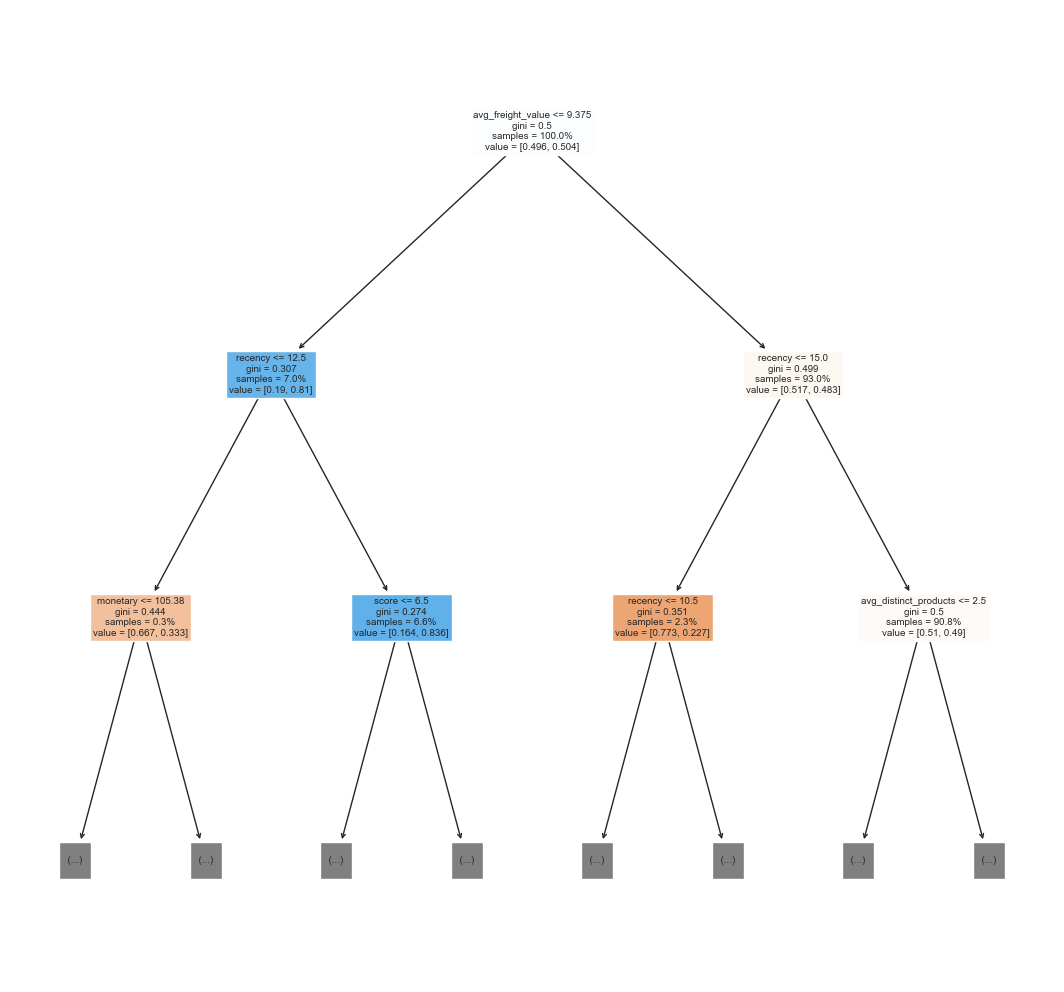

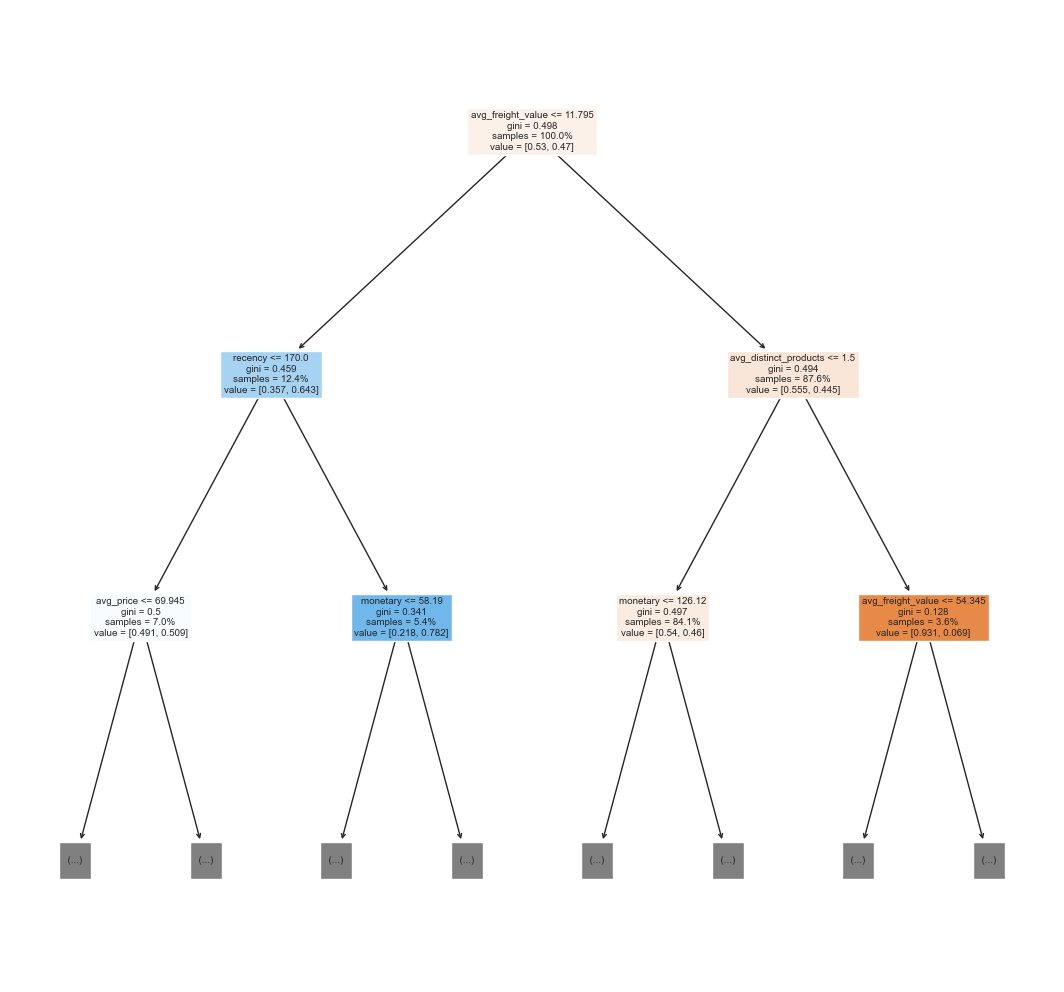

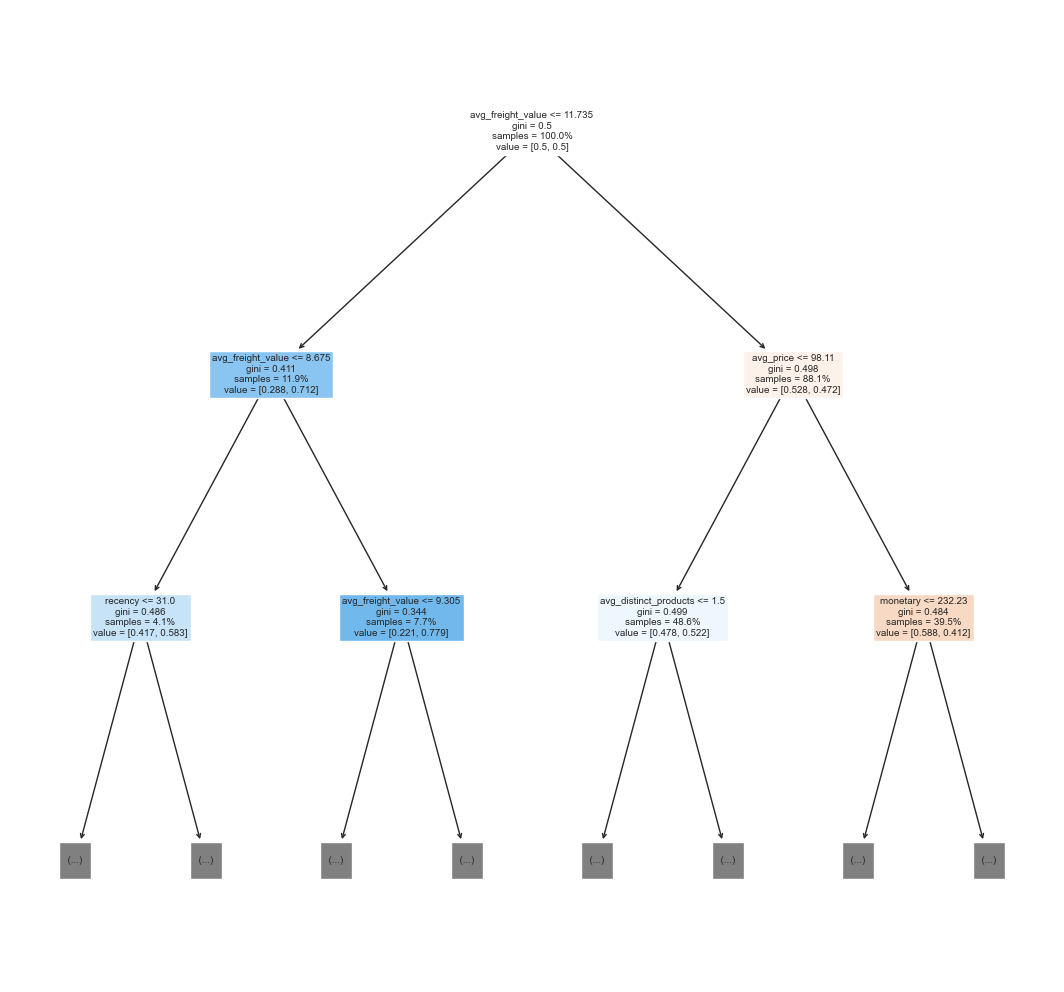

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}


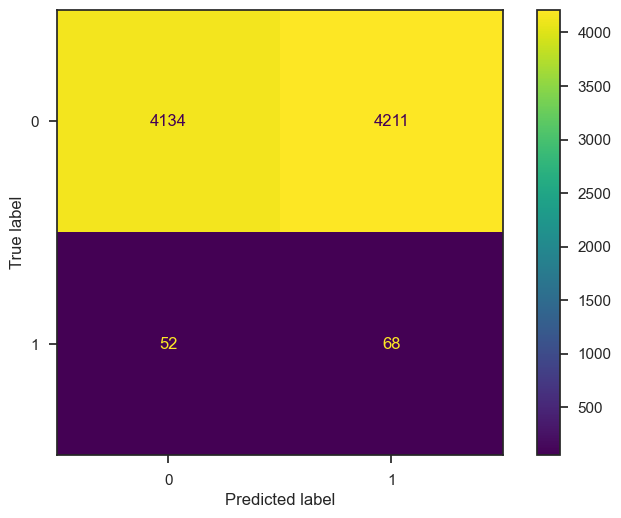

Accuracy: 0.49639692852923806
Recall/Sensitivity: 0.5666666666666667
Specificity: 0.49538645895745953
Precision: 0.015891563449404067
F1 score: 0.030916117299386224


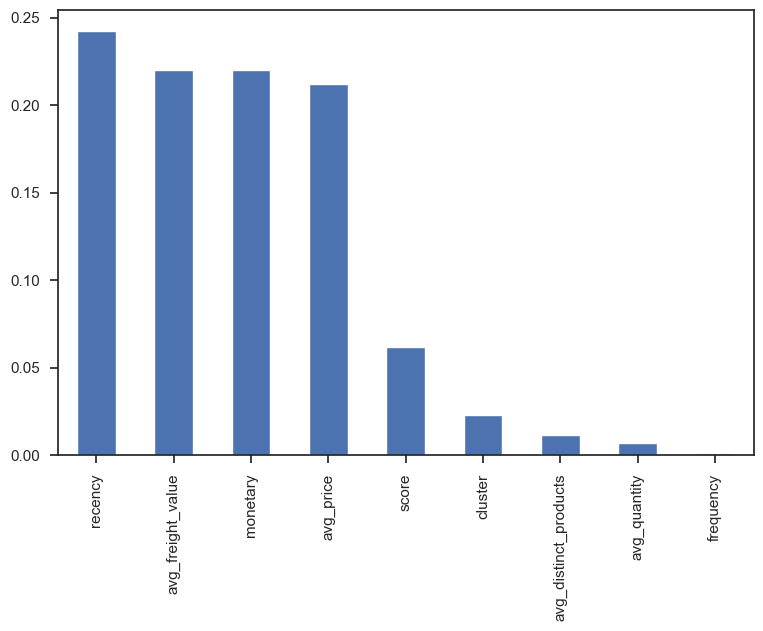

In [15]:
# load and treat dataset
data = pd.read_csv('label.csv')
label=data
label = label.drop(['R_quartil'], axis=1)
label = label.drop(['M_quartil'], axis=1)
label = label.drop(['F_quartil'], axis=1)
label = label.drop(['level'], axis=1)

# Load the other dataset to compare with
future = pd.read_csv('future.csv')

#set index
label = label.set_index('customer_unique_id')

# Split the data into features (X) and target (y)
X = label.drop('label', axis=1)
y = label['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an undersampler object
undersampler = RandomUnderSampler()

# Fit and transform the training data
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

# Fit the model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_resampled, y_train_resampled )

# Generate predictions on the testing data
y_pred = rf.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Evaluate the model's performance using some common KPIs
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the KPIs
print(f"Accuracy: {accuracy}")
print(f"Recall/Sensitivity: {recall}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 score: {f1}")

# # plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    fig, ax = plt.subplots(figsize=(12, 12))
    plot_tree(tree, max_depth=2, feature_names=x_train.columns, filled=True, proportion=True, ax=ax)
    plt.show()

param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=0)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=0)

# Fit the random search object to the data
randmf = rand_search.fit(x_train_resampled, y_train_resampled)

# Create a variable for the best model
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)
best_rf_params = best_rf.get_params()

# Generate predictions with the best model
y_pred = randmf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Evaluate the model's performance using some common KPIs
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the KPIs
print(f"Accuracy: {accuracy}")
print(f"Recall/Sensitivity: {recall}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 score: {f1}")

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()

Number of customers not in the other dataset: 41756
Number of customers in the other dataset: 568


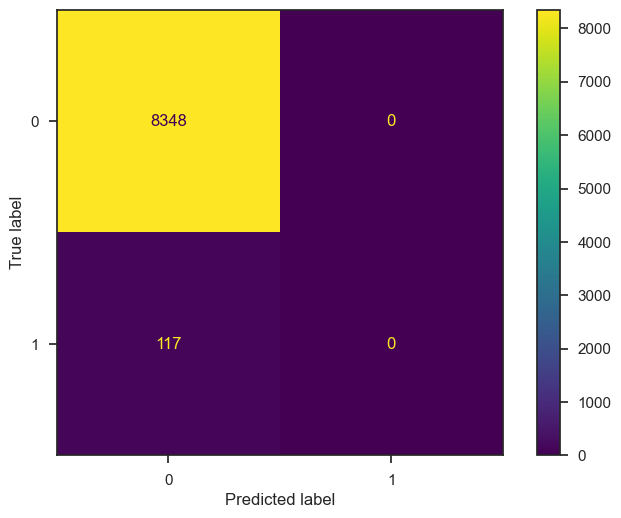

Accuracy: 0.9861783815711754
Recall/Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
F1 score: 0.0


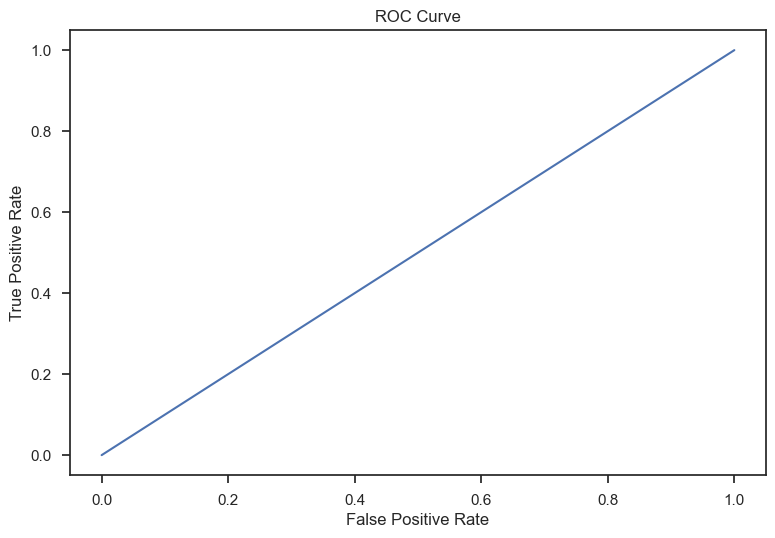

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None}


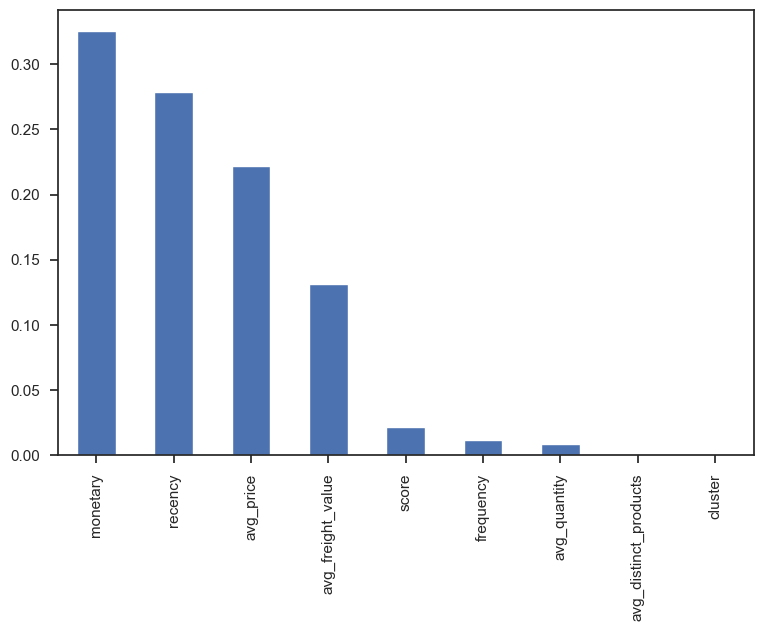

In [14]:
# load and treat dataset
data = pd.read_csv('k_means.csv')
label=data
label = label.drop(['R_quartil'], axis=1)
label = label.drop(['M_quartil'], axis=1)
label = label.drop(['F_quartil'], axis=1)
label = label.drop(['level'], axis=1)

# Load the other dataset to compare with
future = pd.read_csv('future.csv')

# Create a new column label with value 0
label['label'] = 0

# Set label to 1 for customer_ids present in future
label.loc[future['customer_unique_id'].isin(label['customer_unique_id']), 'label'] = 1

# Count the number of 1s and 0s in label
counts = label['label'].value_counts()

# Print the counts
print("Number of customers not in the other dataset:", counts[0])
print("Number of customers in the other dataset:", counts[1])

#set index
label = label.set_index('customer_unique_id')

# Split the data into features (X) and target (y)
X = label.drop('label', axis=1)
y = label['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#define hyperparameters
param_dist = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

# Fit the model to the training data
decision_tree = DecisionTreeClassifier(random_state=0)

# Perform grid search with 5-fold cross-validation
rand_search = RandomizedSearchCV(decision_tree, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=0)

rand_search = rand_search.fit(x_train, y_train)
# Generate predictions on the testing data
y_pred = rand_search.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Evaluate the model's performance using some common KPIs
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the KPIs
print(f"Accuracy: {accuracy}")
print(f"Recall/Sensitivity: {recall}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 score: {f1}")

# # plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Create a variable for the best model
best_dt = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()